In [224]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

#invite people for the Kaggle party

from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [225]:
train = pd.read_csv('house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('house-prices-advanced-regression-techniques/test.csv')

In [226]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [227]:
train.drop('Id',axis=1,inplace = True)

<Axes: xlabel='SalePrice', ylabel='Count'>

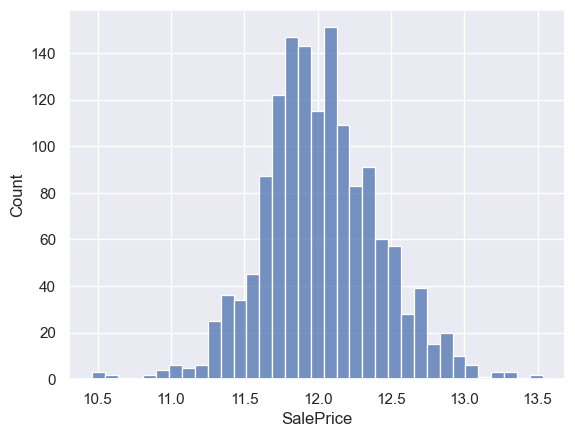

In [228]:
sns.histplot(np.log(train['SalePrice']))

<Axes: xlabel='MSSubClass', ylabel='count'>

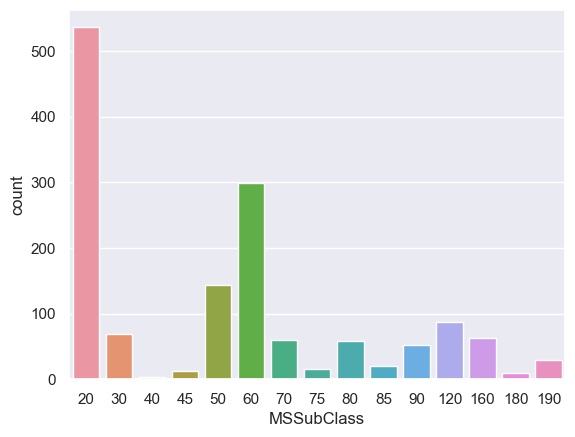

In [229]:
sns.countplot(x = 'MSSubClass',data = train)

<Axes: xlabel='MSZoning', ylabel='count'>

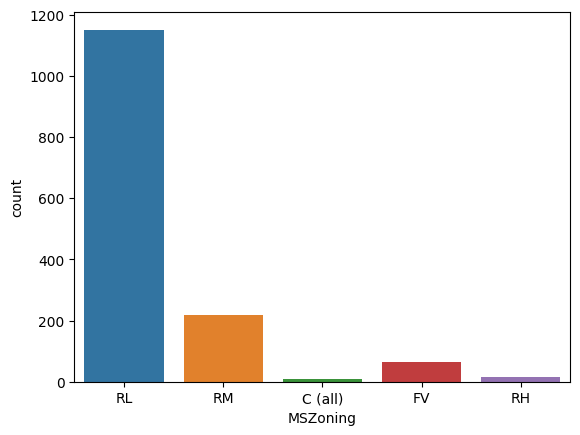

In [21]:
sns.countplot(x = 'MSZoning',data = train)

<Axes: xlabel='LotFrontage', ylabel='Count'>

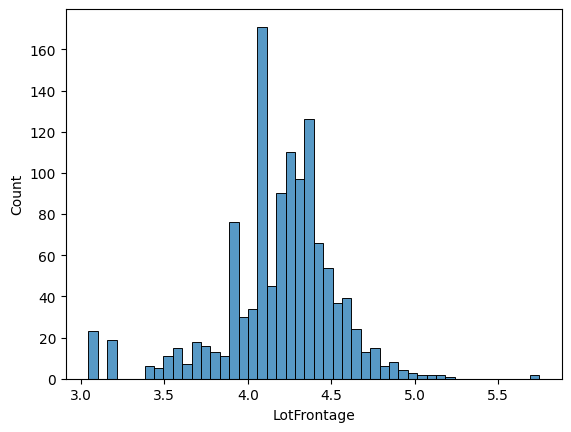

In [26]:
sns.histplot(np.log(train['LotFrontage']))

In [230]:
numeric_data = train.select_dtypes(include=[np.number])

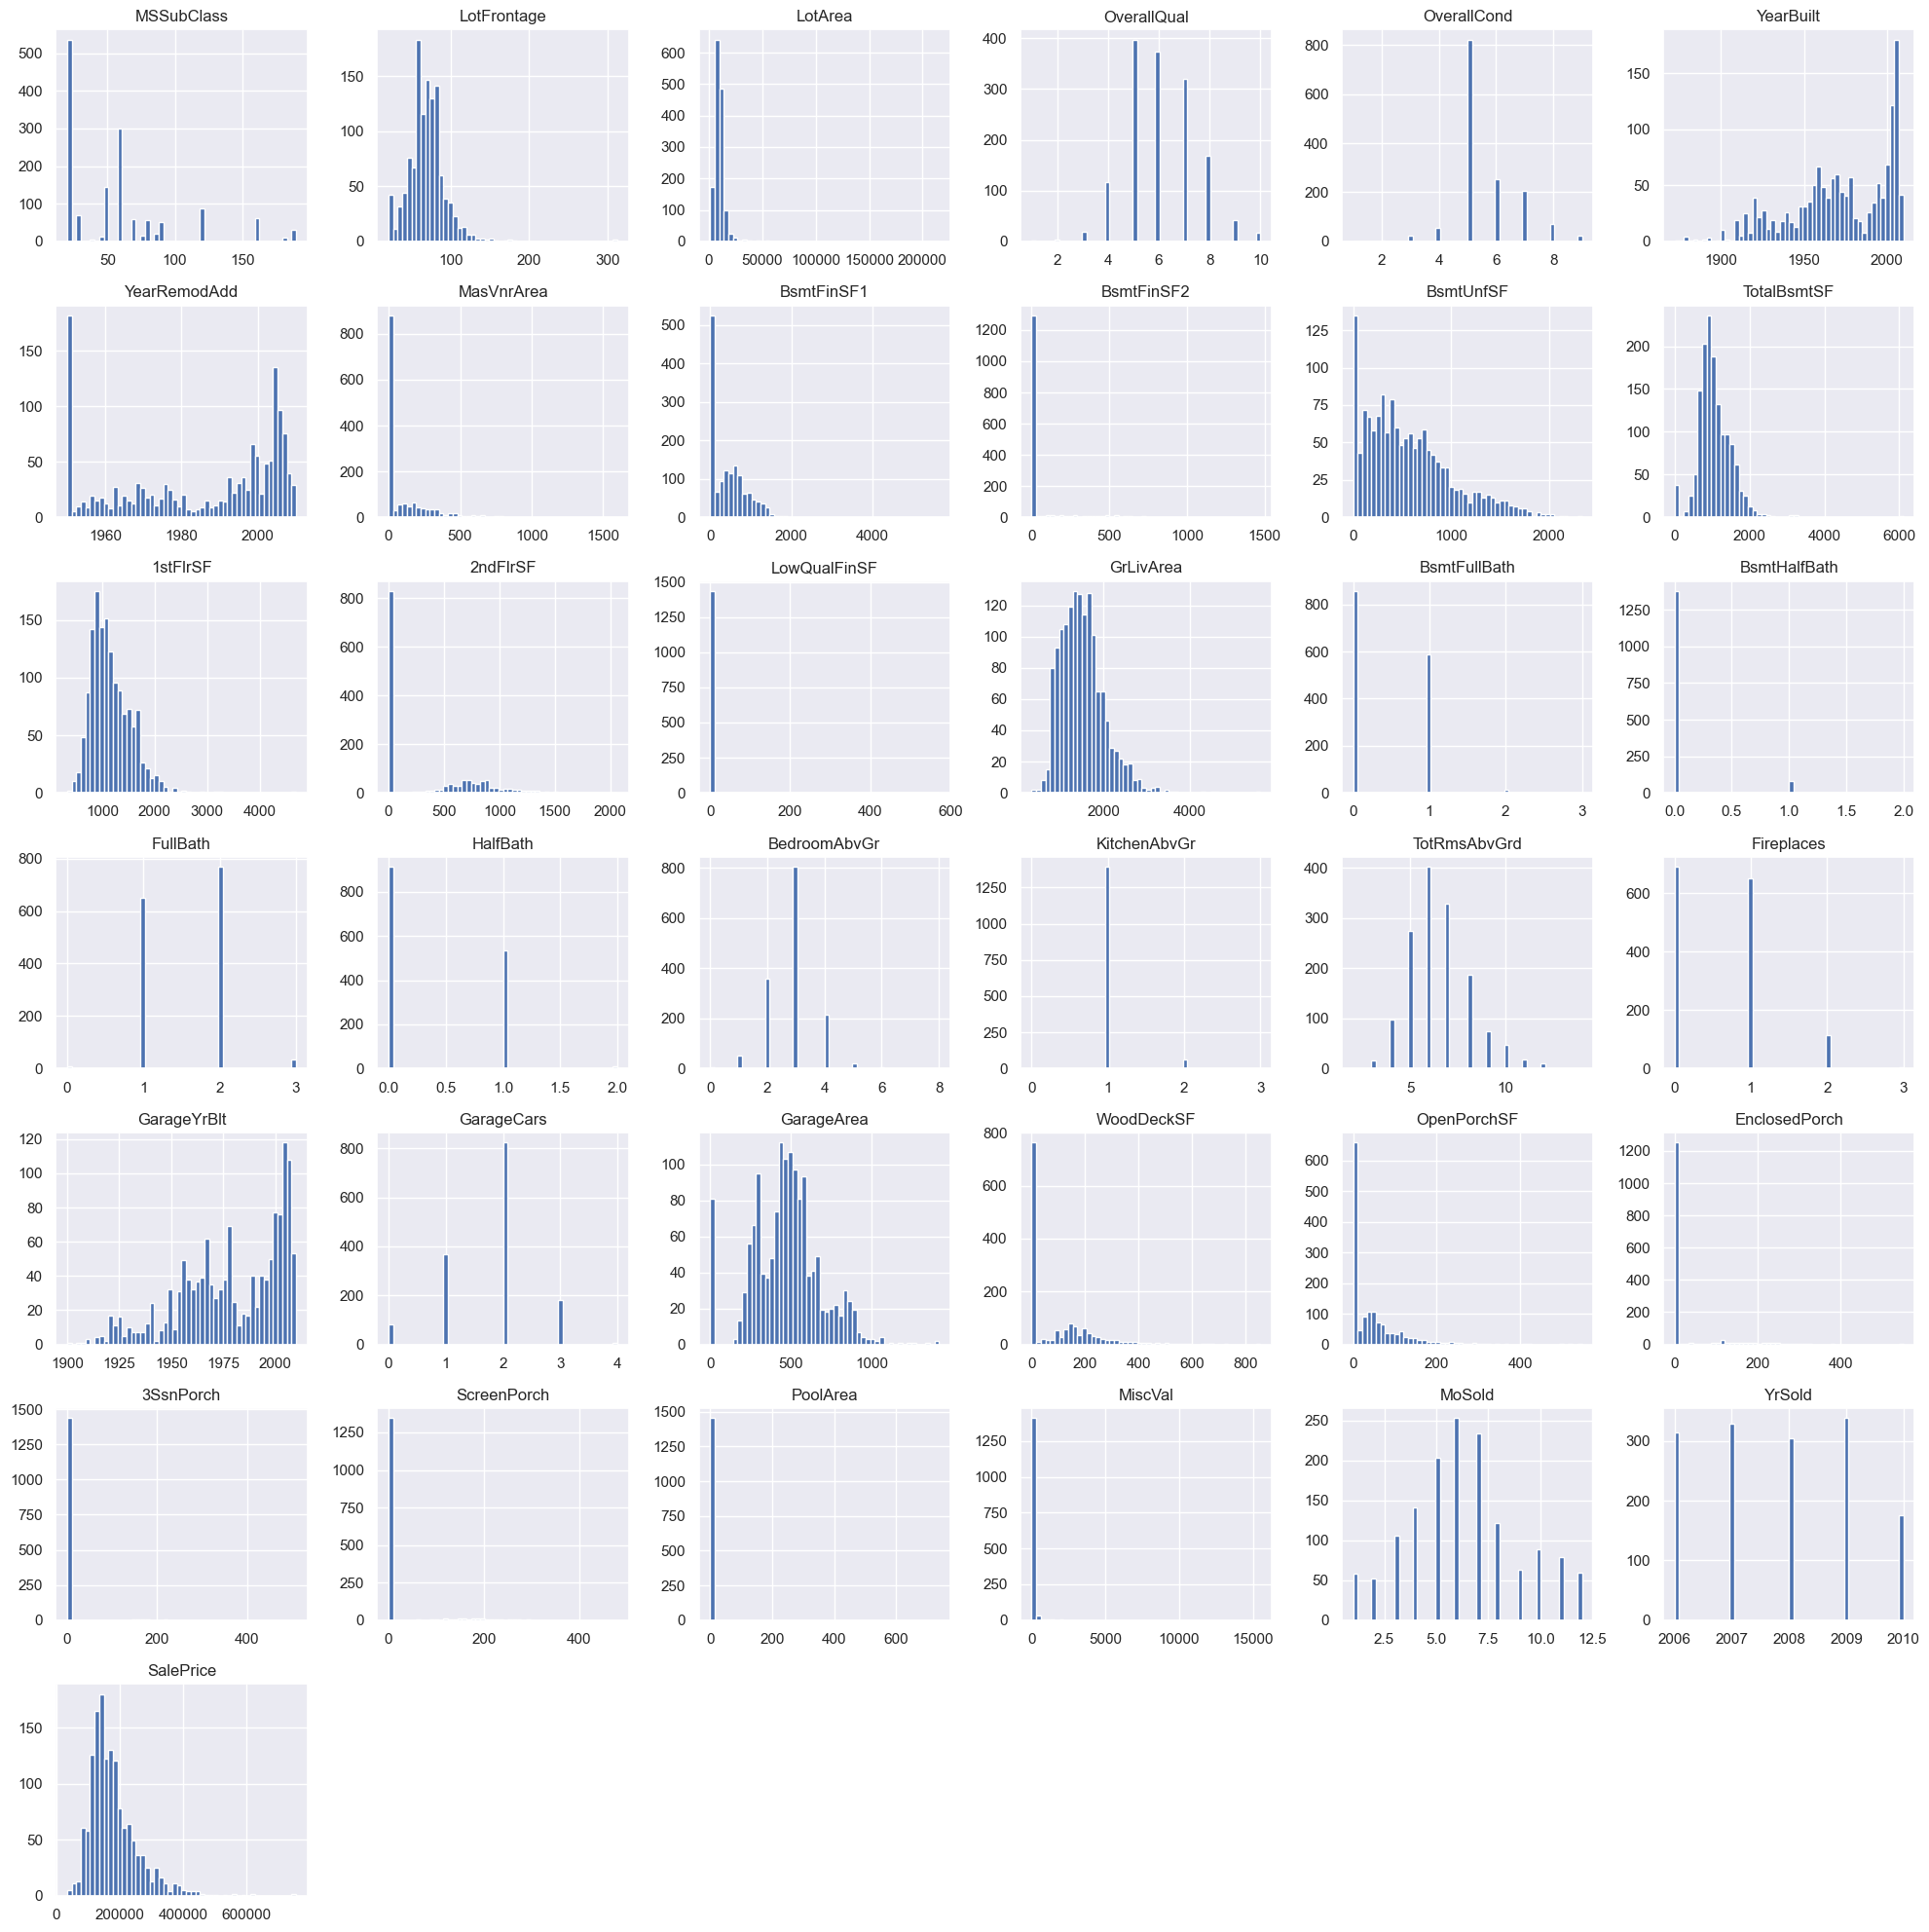

In [234]:
numeric_data.hist(bins = 50, figsize = (20,20))
plt.tight_layout()
plt.show()

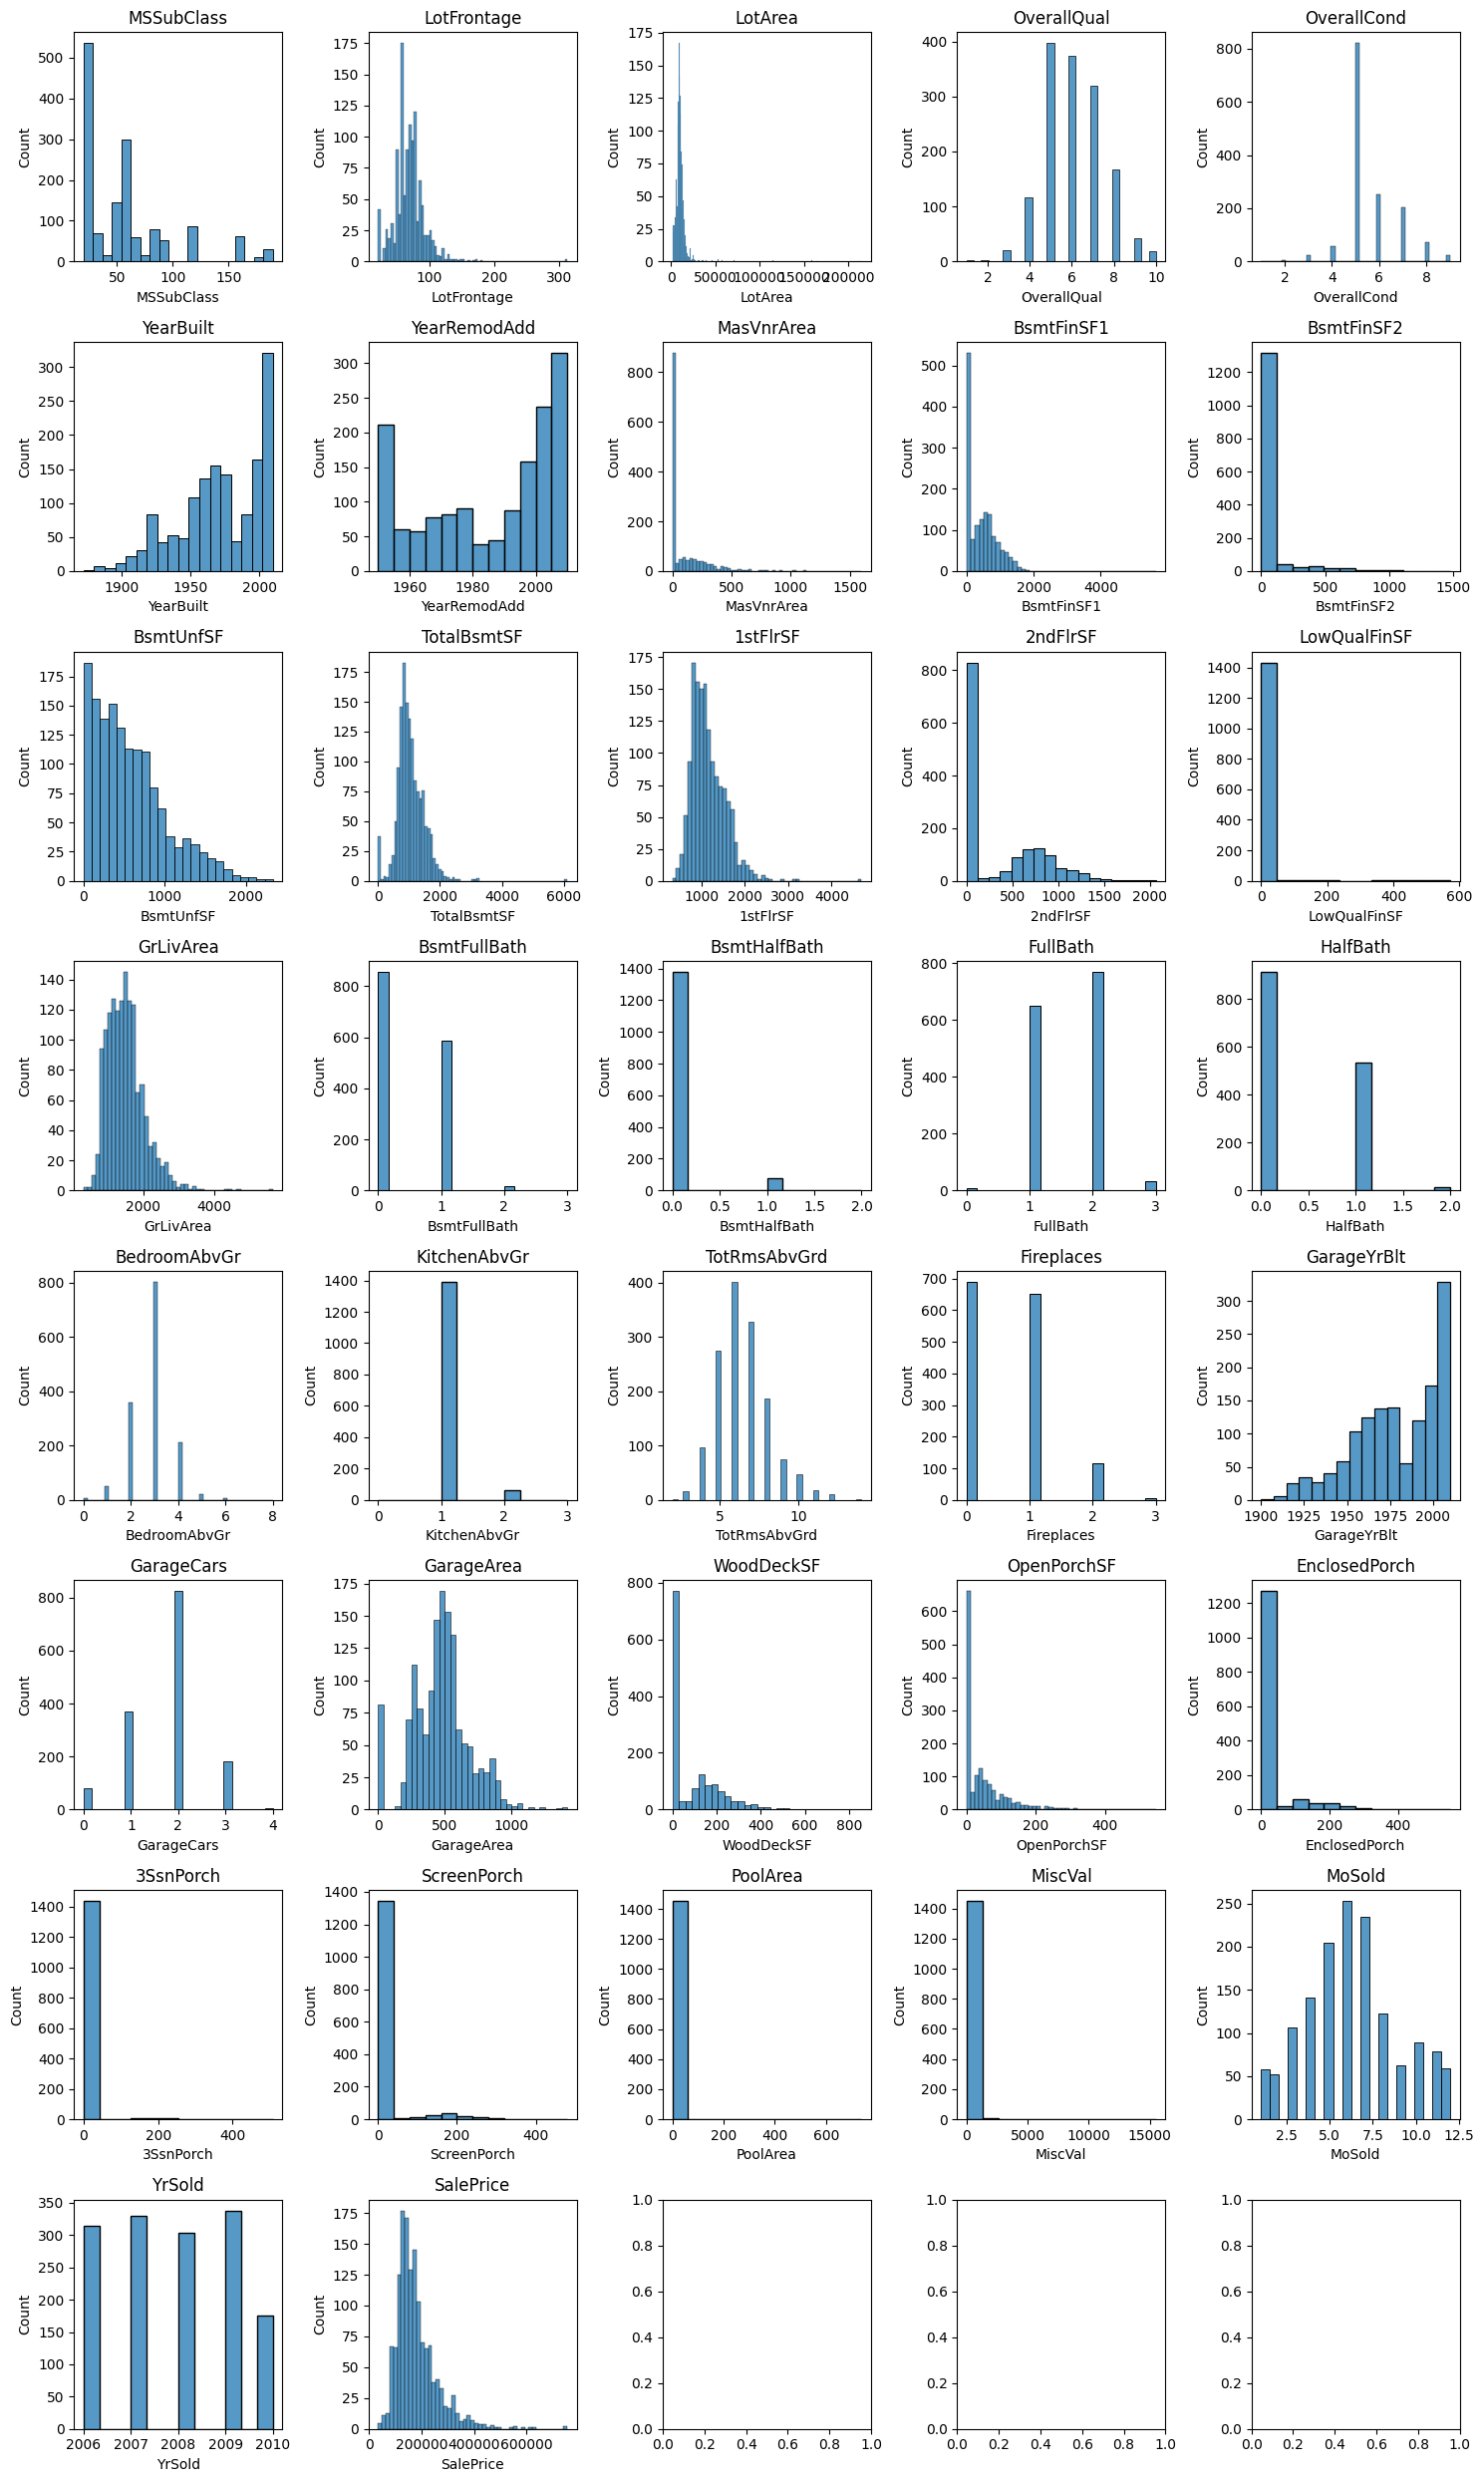

In [40]:
f, axes = plt.subplots(nrows = 8, ncols=5, figsize=(15,25))
axess = axes.flatten()

i = 0
for column in numeric_data.columns:
    sns.histplot(train[column],ax=axess[i])
    axess[i].set_title(column)
    i+=1

    
plt.tight_layout()
plt.show()

In [237]:
category_data = train.select_dtypes(include=[object])

In [238]:
category_data

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


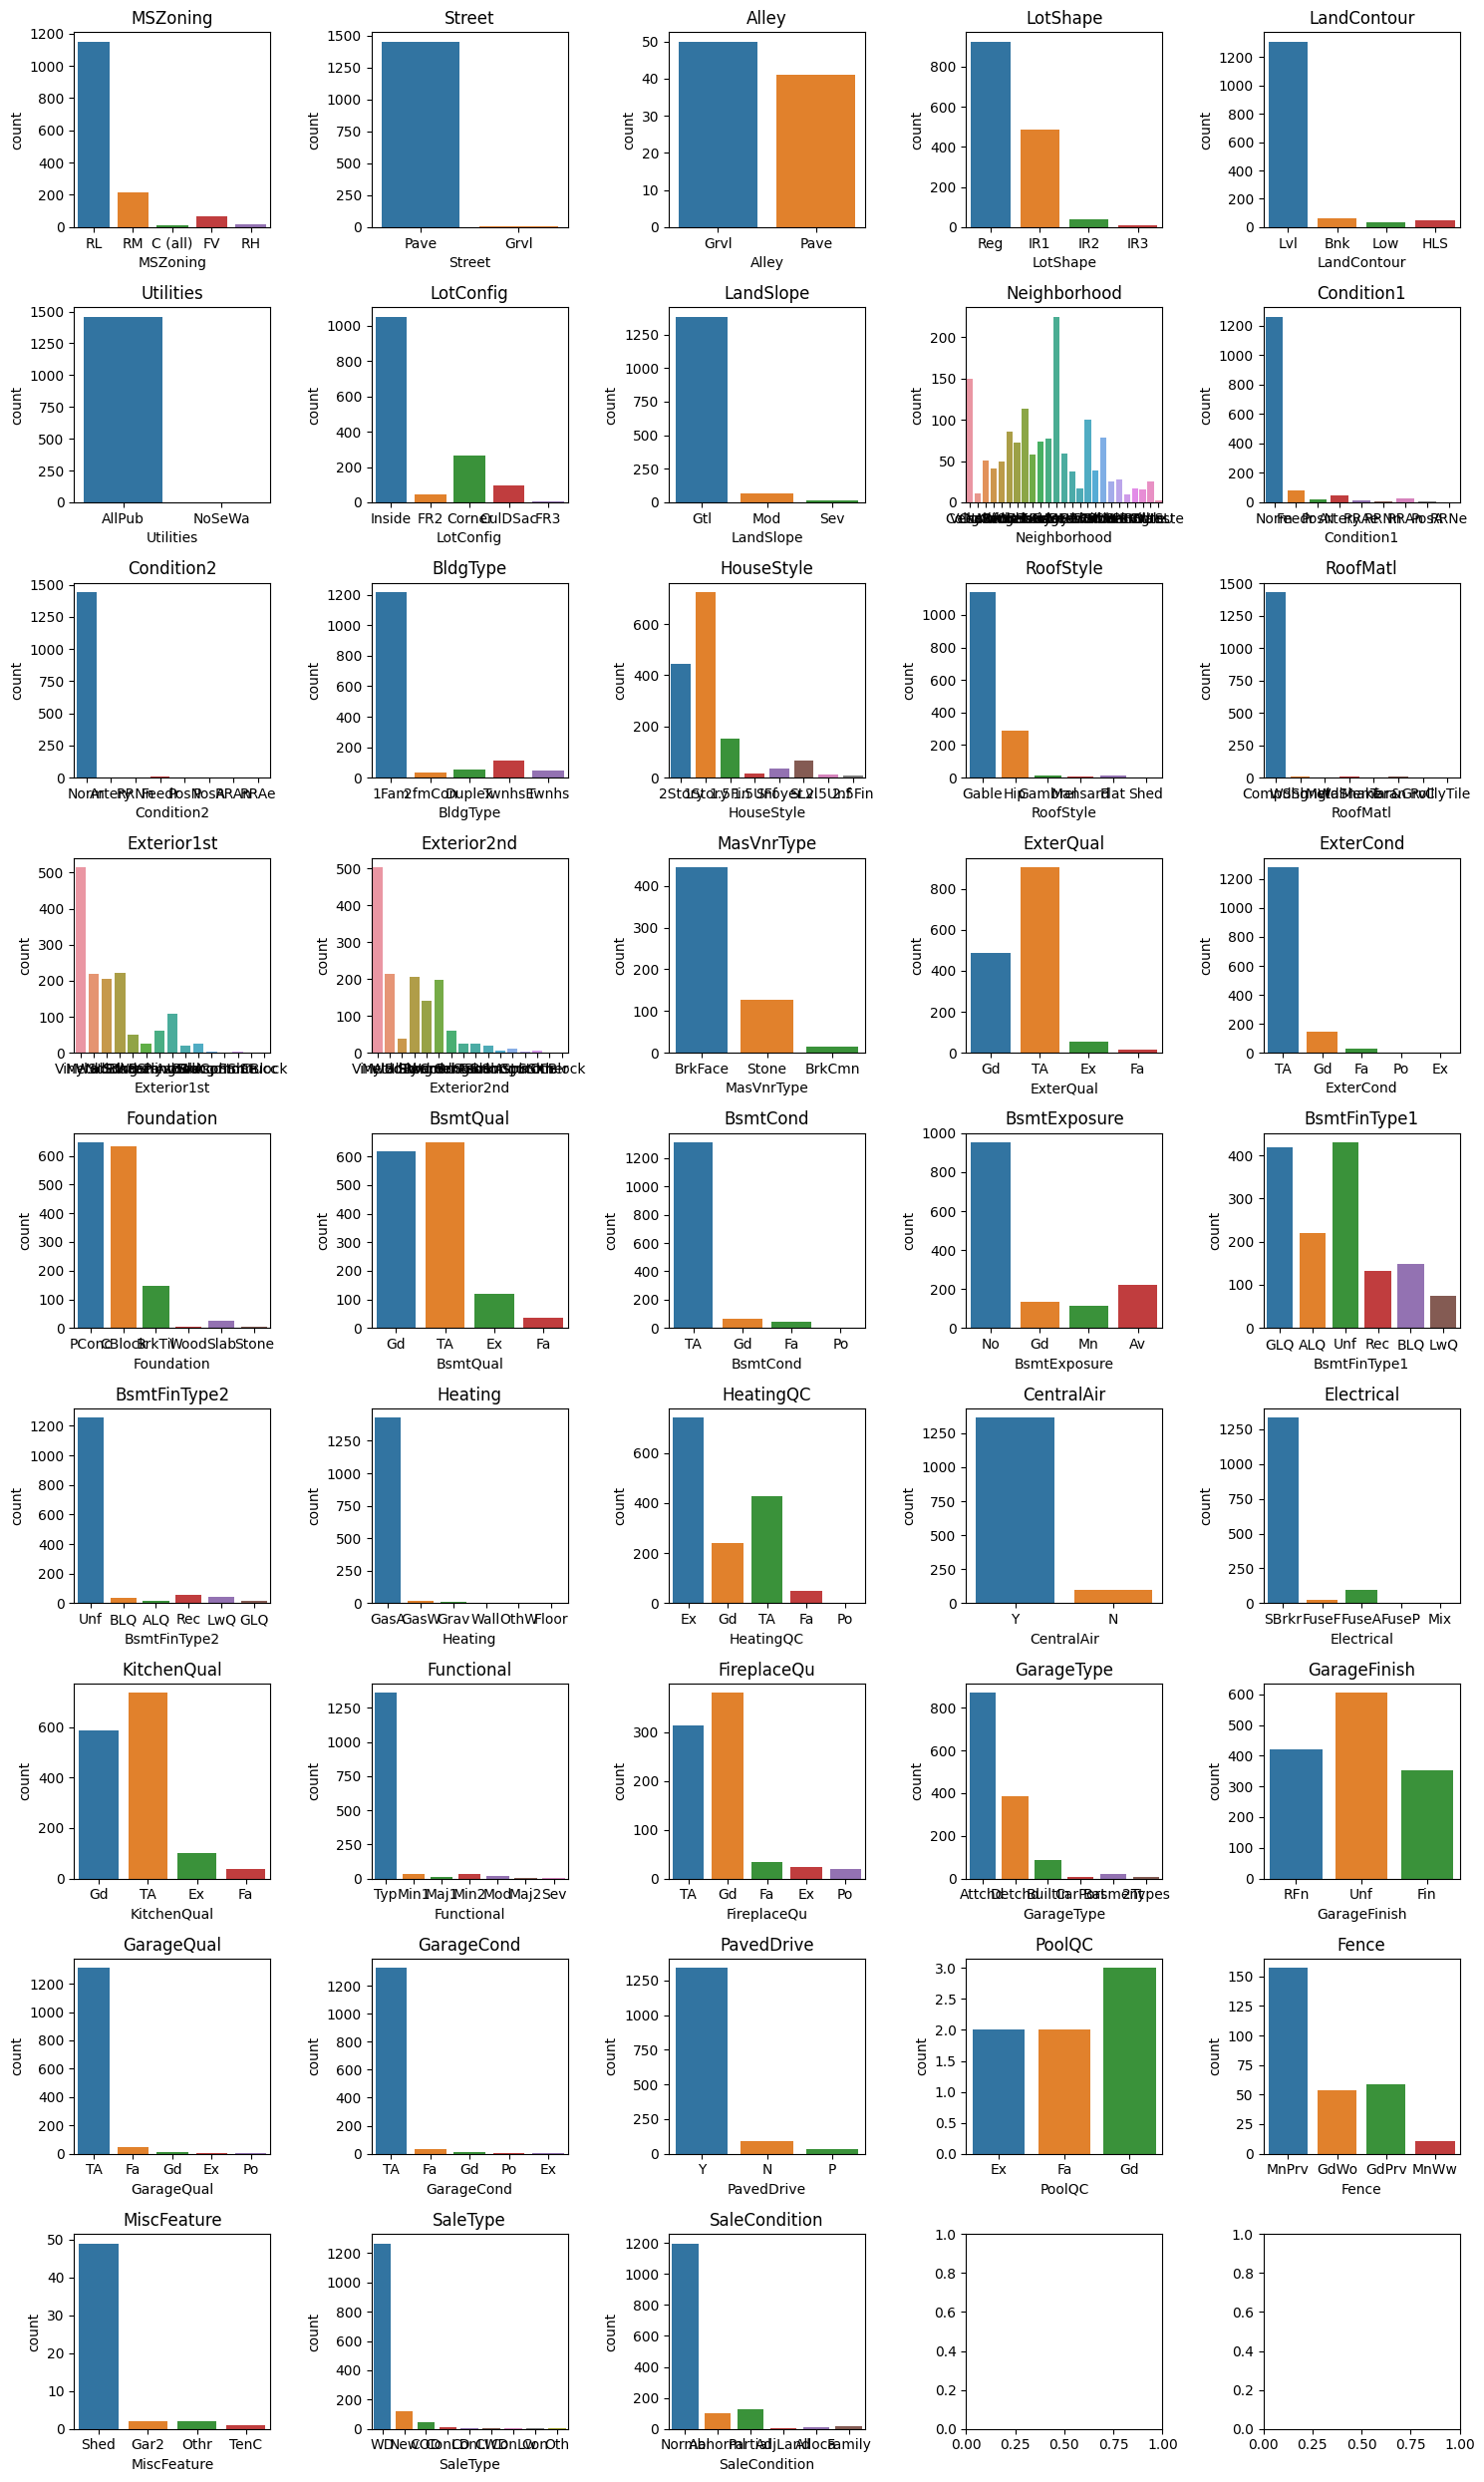

In [46]:
f, axes = plt.subplots(nrows = 9, ncols=5, figsize=(15,25))
axess = axes.flatten()

i = 0
for column in category_data.columns:
    sns.countplot(x = column,data = train, ax=axess[i])
    axess[i].set_title(column)
    i+=1

    
plt.tight_layout()
plt.show()

In [48]:
train_new = pd.get_dummies(train, columns=category_data.columns, drop_first=True)

In [49]:
train_new

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,False,False,False,False,True,False,False,False,True,False
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,False,False,False,False,True,False,False,False,True,False
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,False,False,False,False,True,False,False,False,True,False
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,False,False,False,False,True,False,False,False,False,False
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,False,False,False,False,True,False,False,False,True,False
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,False,False,False,False,True,False,False,False,True,False
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,False,False,False,False,True,False,False,False,True,False
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,False,False,False,False,True,False,False,False,True,False


In [241]:
def find_nan_values(df):
    if df.isnull().values.any():
        null_columns=df.columns[df.isnull().any()].tolist()
        for column in null_columns:
            total_values=df.shape[0]
            null_values=df[column].isnull().sum()
            print("No. of Nan Values in '{}' column --> {}".format(column,null_values))
            print("{:.2f} % of Total values".format((100 * null_values) / total_values))
            print("\n")
    else:
        print("No Column has Nan Values")

In [62]:
find_nan_values(train_new)

No. of Nan Values in 'LotFrontage' column --> 259
17.74 % of Total values


No. of Nan Values in 'MasVnrArea' column --> 8
0.55 % of Total values


No. of Nan Values in 'GarageYrBlt' column --> 81
5.55 % of Total values




In [242]:
find_nan_values(train)

No. of Nan Values in 'LotFrontage' column --> 259
17.74 % of Total values


No. of Nan Values in 'Alley' column --> 1369
93.77 % of Total values


No. of Nan Values in 'MasVnrType' column --> 872
59.73 % of Total values


No. of Nan Values in 'MasVnrArea' column --> 8
0.55 % of Total values


No. of Nan Values in 'BsmtQual' column --> 37
2.53 % of Total values


No. of Nan Values in 'BsmtCond' column --> 37
2.53 % of Total values


No. of Nan Values in 'BsmtExposure' column --> 38
2.60 % of Total values


No. of Nan Values in 'BsmtFinType1' column --> 37
2.53 % of Total values


No. of Nan Values in 'BsmtFinType2' column --> 38
2.60 % of Total values


No. of Nan Values in 'Electrical' column --> 1
0.07 % of Total values


No. of Nan Values in 'FireplaceQu' column --> 690
47.26 % of Total values


No. of Nan Values in 'GarageType' column --> 81
5.55 % of Total values


No. of Nan Values in 'GarageYrBlt' column --> 81
5.55 % of Total values


No. of Nan Values in 'GarageFinish' column -

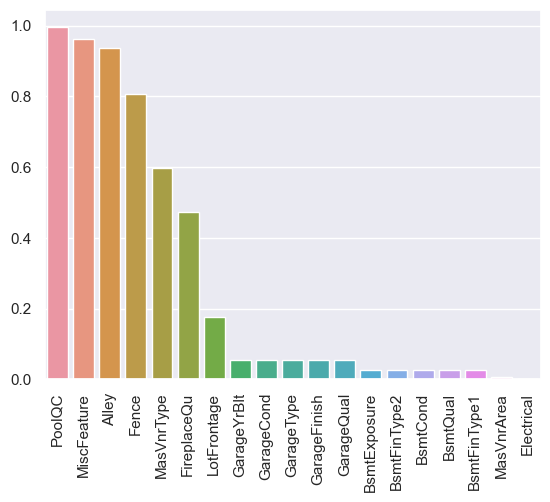

In [252]:
nacount = train.isna().sum().sort_values(ascending = False)/len(train)
nacount = nacount[nacount>0]
sns.barplot(x = nacount.index, y = nacount.values)
plt.xticks(rotation=90);

In [258]:
train['Fence'].value_counts()

Fence
MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: count, dtype: int64

In [260]:
train['Fence'].fillna('None',inplace = True)

In [275]:
train['MiscFeature'].value_counts()

MiscFeature
Shed    49
Gar2     2
Othr     2
TenC     1
Name: count, dtype: int64

In [295]:
MiscFeature_mapping = {"Shed":"Shed","Gar2":"Othr","TenC":"Othr",np.nan:"None","Othr":"Othr"}
train['MiscFeature'] = train['MiscFeature'].apply(lambda x:MiscFeature_mapping[x])

In [299]:
train['Alley'].fillna('None',inplace = True)

In [305]:
train[['PoolQC','PoolArea']].dropna()

,PoolQC,PoolArea
197,Ex,512
810,Fa,648
1170,Gd,576
1182,Ex,555
1298,Gd,480
1386,Fa,519
1423,Gd,738


In [308]:
train['Pool'] = train['PoolArea'].apply(lambda x:1 if x>0 else 0)

In [310]:
train['Pool'].value_counts()

Pool
0    1453
1       7
Name: count, dtype: int64

In [312]:
train.drop(['PoolQC','PoolArea'],axis=1,inplace = True)

In [314]:
train['FireplaceQu'].value_counts()

FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64

In [325]:
FireplaceQu_mapping = {np.nan:0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}
train['FireplaceQu'] = train['FireplaceQu'].apply(lambda x:FireplaceQu_mapping[x])

In [328]:
train['LotFrontage'].isna().sum()

259

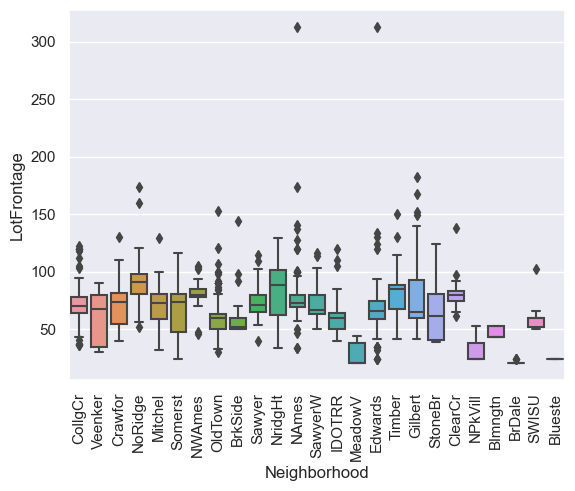

In [331]:
sns.boxplot(x = 'Neighborhood' ,y = 'LotFrontage', data = train)
plt.xticks(rotation=90);

In [348]:
median_lotfrontage = train.groupby('Neighborhood')['LotFrontage'].transform('median')

In [350]:
train['LotFrontage'] = train['LotFrontage'].fillna(median_lotfrontage)

In [363]:
train[[x for x in train.columns if 'Garage' in x]].isna().sum()

GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageCars       0
GarageArea       0
GarageQual      81
GarageCond      81
dtype: int64

In [372]:
train['GarageType'].fillna('None',inplace = True)

<Axes: xlabel='GarageType', ylabel='SalePrice'>

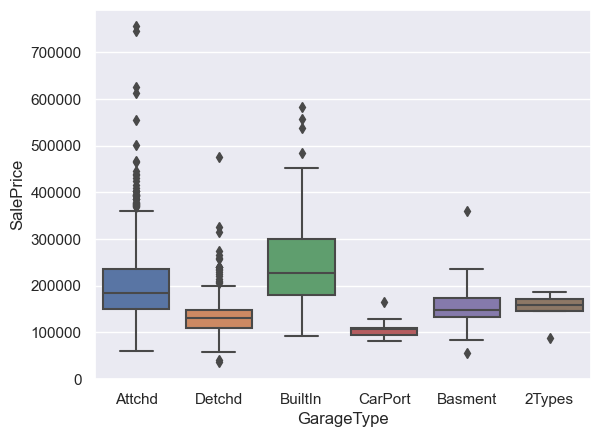

In [370]:
sns.boxplot(x = 'GarageType',y = 'SalePrice',data= train)

In [381]:
train['GarageYrBlt'].fillna('-999',inplace = True)

<Axes: xlabel='GarageYrBlt', ylabel='SalePrice'>

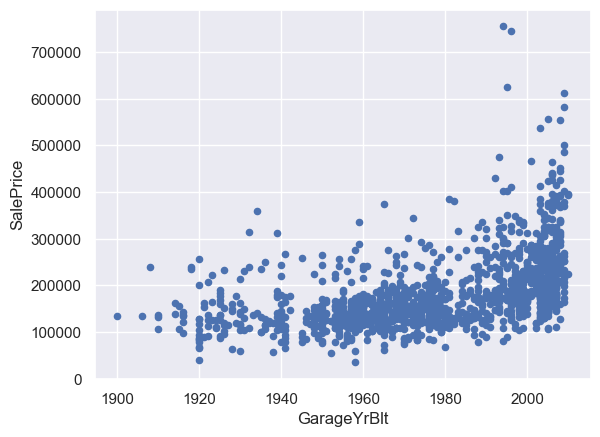

In [380]:
train.plot(kind = 'scatter', x = 'GarageYrBlt',y ='SalePrice')

In [384]:
GarageFinish_mapping = {np.nan:0,'Unf':1,'RFn':2,'Fin':3}
train['GarageFinish'] = train['GarageFinish'].apply(lambda x:GarageFinish_mapping[x])

In [386]:
GarageQual_mapping = {np.nan:0, 'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}
train['GarageQual'] = train['GarageQual'].apply(lambda x:GarageQual_mapping[x])

In [389]:
train['GarageCond']= train['GarageCond'].apply(lambda x:GarageQual_mapping[x])

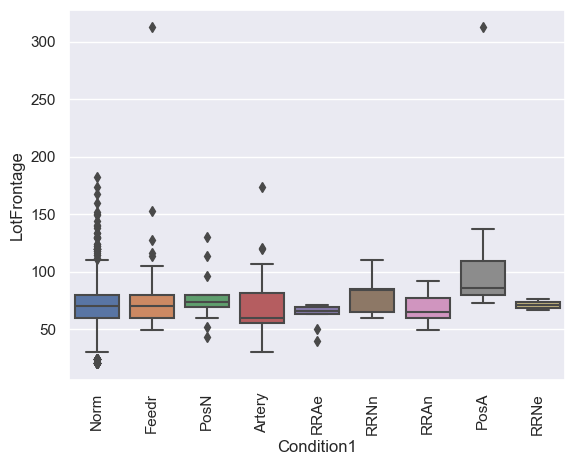

In [362]:
sns.boxplot(x = 'Condition1' ,y = 'LotFrontage', data = train)
plt.xticks(rotation=90);

In [393]:
BsmtExposure_maping = {np.nan:0,'No':1,'Mn':2,'Av':3,'Gd':4}
train['BsmtExposure'] = train['BsmtExposure'].apply(lambda x:BsmtExposure_maping[x])

In [396]:
train['Utilities'].value_counts()

Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64

In [400]:
train['MSSubClass'].astype(str)

0       60
1       20
2       60
3       70
4       60
        ..
1455    60
1456    20
1457    70
1458    20
1459    20
Name: MSSubClass, Length: 1460, dtype: object

In [401]:
ord_fields=['MSSubClass','ExterQual','LotShape','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1', 'BsmtFinType2','HeatingQC','Functional','FireplaceQu','KitchenQual', 'GarageFinish','GarageQual','GarageCond','PoolQC','Fence']

In [405]:
orders={'MSSubClass': ['20','30','40','45','50','60','70','75','80','85', '90','120','150','160','180','190'], 'ExterQual' :['Fa','TA','Gd','Ex']}

In [411]:
from sklearn.preprocessing import OrdinalEncoder
for x in ord_fields[:2]:
    ord_en=OrdinalEncoder(categories= [orders[x]]) 
    train.loc[:,x]=ord_en.fit_transform(train.loc[:,x].values.reshape(-1,1))

In [414]:
train['ExterQual']

0       2.0
1       1.0
2       2.0
3       1.0
4       2.0
       ... 
1455    1.0
1456    1.0
1457    3.0
1458    1.0
1459    2.0
Name: ExterQual, Length: 1460, dtype: object

In [69]:
numeric_data.corr().loc['LotFrontage'].sort_values()

MSSubClass      -0.386347
OverallCond     -0.059213
BsmtHalfBath    -0.007234
KitchenAbvGr    -0.006069
MiscVal          0.003368
YrSold           0.007450
EnclosedPorch    0.010700
MoSold           0.011200
LowQualFinSF     0.038469
ScreenPorch      0.041383
BsmtFinSF2       0.049900
HalfBath         0.053532
3SsnPorch        0.070029
GarageYrBlt      0.070250
2ndFlrSF         0.080177
WoodDeckSF       0.088521
YearRemodAdd     0.088866
BsmtFullBath     0.100949
YearBuilt        0.123349
BsmtUnfSF        0.132644
OpenPorchSF      0.151972
MasVnrArea       0.193458
FullBath         0.198769
PoolArea         0.206167
BsmtFinSF1       0.233633
OverallQual      0.251646
BedroomAbvGr     0.263170
Fireplaces       0.266639
GarageCars       0.285691
GarageArea       0.344997
SalePrice        0.351799
TotRmsAbvGrd     0.352096
TotalBsmtSF      0.392075
GrLivArea        0.402797
LotArea          0.426095
1stFlrSF         0.457181
LotFrontage      1.000000
Name: LotFrontage, dtype: float64

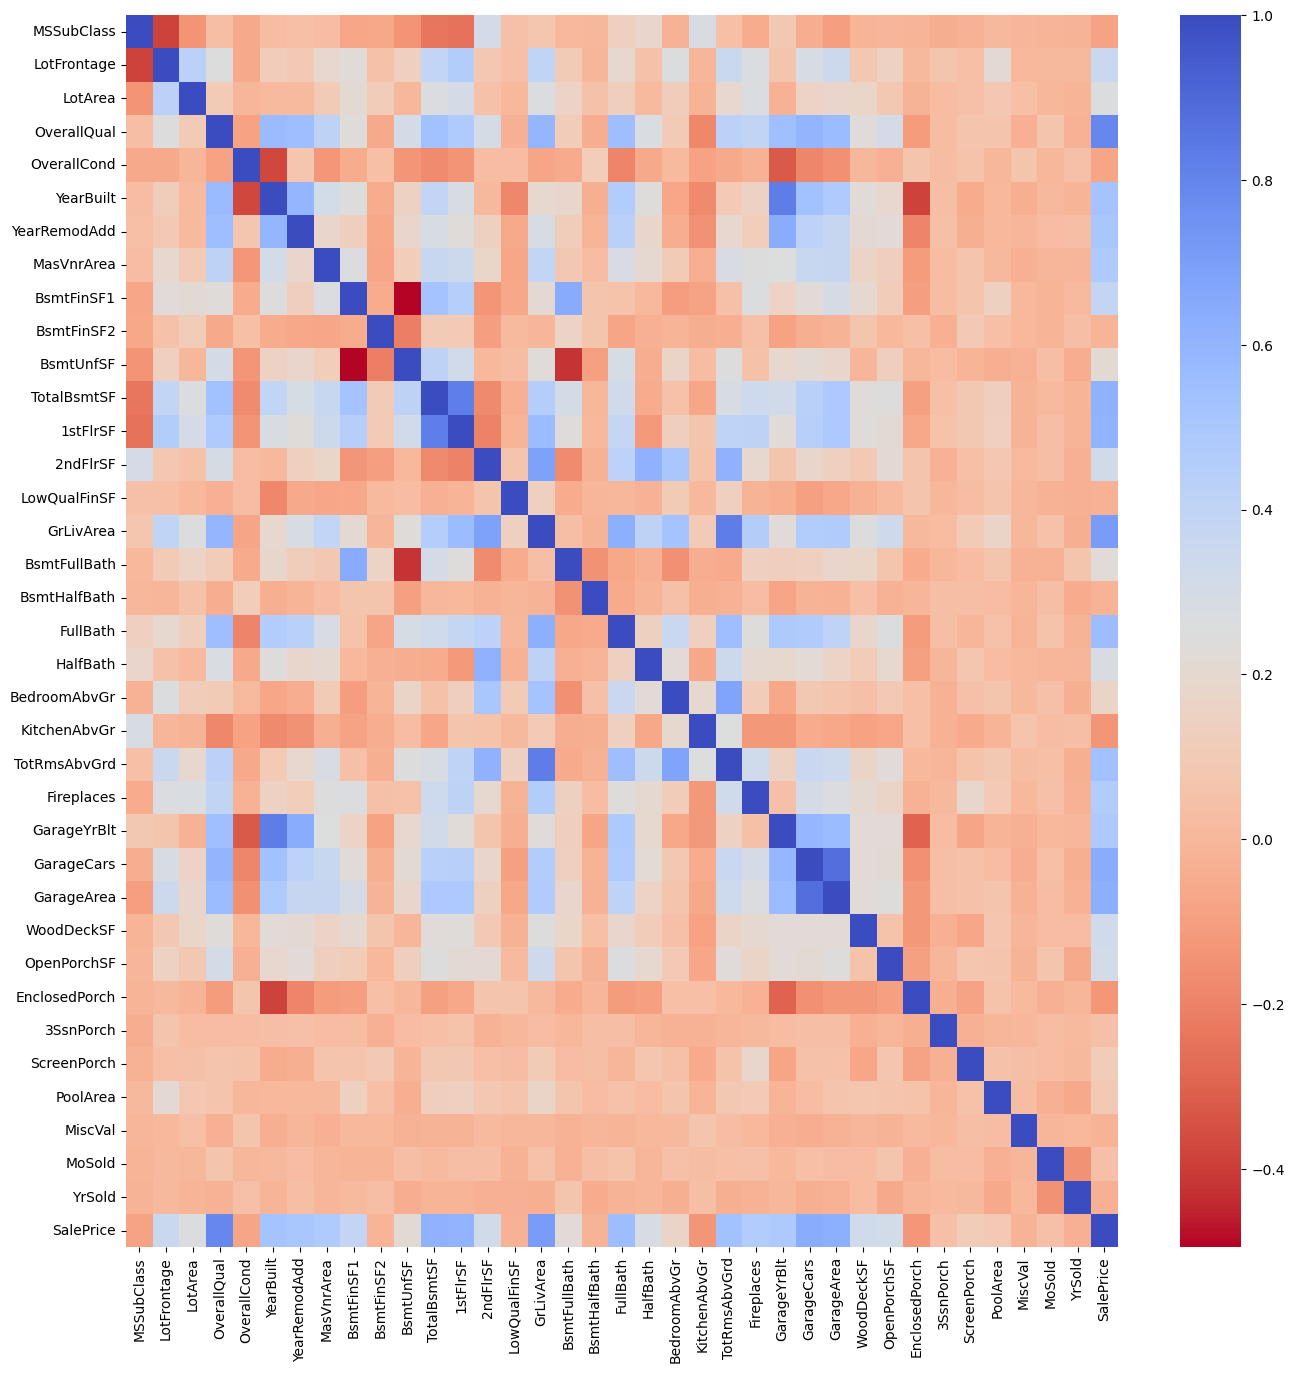

In [66]:
plt.figure(figsize = (16,16))
sns.heatmap(numeric_data.corr(),cmap='coolwarm_r')
plt.show()

In [420]:
from scipy.stats import norm, skew #for some statistics

numeric_feats = train.dtypes[train.dtypes != "object"].index

skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,24.451640
Pool,14.337930
LotArea,12.195142
3SsnPorch,10.293752
LowQualFinSF,9.002080
KitchenAbvGr,4.483784
BsmtFinSF2,4.250888
ScreenPorch,4.117977
BsmtHalfBath,4.099186
EnclosedPorch,3.086696


In [422]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    train[feat] = boxcox1p(train[feat], lam)

There are 41 skewed numerical features to Box Cox transform


In [54]:
y = train_new['SalePrice']
X = train_new.drop('SalePrice',axis=1)

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size=0.3)

In [57]:
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

In [58]:
X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.transform(X_test)

array([[-0.16874436,         nan,  0.26597053, ..., -0.11785113,
         0.45297757, -0.29730776],
       [-0.63610679, -0.56648763, -0.60093416, ..., -0.11785113,
         0.45297757, -0.29730776],
       [-0.869788  ,         nan, -0.18023041, ..., -0.11785113,
         0.45297757, -0.29730776],
       ...,
       [-0.16874436, -0.40756007, -0.02633662, ..., -0.11785113,
         0.45297757, -0.29730776],
       [ 0.53229928, -0.20890061, -0.21346783, ..., -0.11785113,
         0.45297757, -0.29730776],
       [ 0.53229928,         nan,  0.18856832, ..., -0.11785113,
         0.45297757, -0.29730776]])

1. Understand the problem. We'll look at each variable and do a philosophical analysis about their meaning and importance for this problem.

2. Univariable study. We'll just focus on the dependent variable ('SalePrice') and try to know a little bit more about it.

3. Multivariate study. We'll try to understand how the dependent variable and independent variables relate.

4. Basic cleaning. We'll clean the dataset and handle the missing data, outliers and categorical variables.

5. Test assumptions. We'll check if our data meets the assumptions required by most multivariate techniques.


In [74]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<Axes: xlabel='SalePrice', ylabel='Density'>

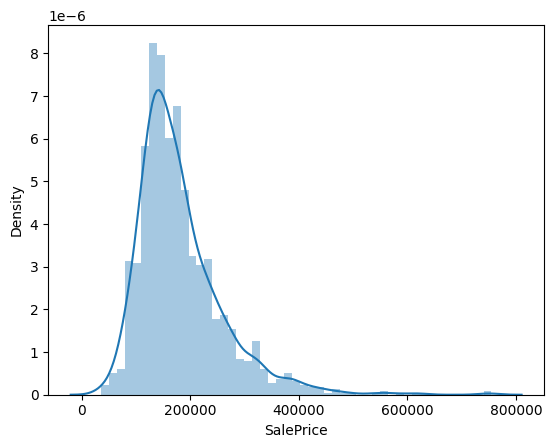

In [73]:
sns.distplot(train['SalePrice'])

1. Deviate from the normal distribution.
2. Have appreciable positive skewness.
3. Show peakedness

In [76]:
#skewness and kurtosis
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

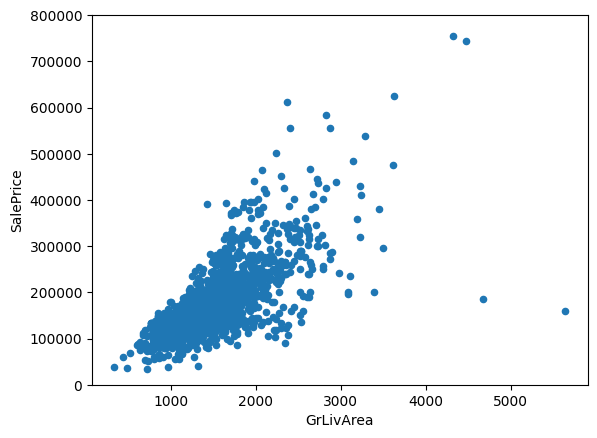

In [78]:
#scatter plot grlivarea/saleprice
var = 'GrLivArea'
data = train[['SalePrice',var]]
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

<Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>

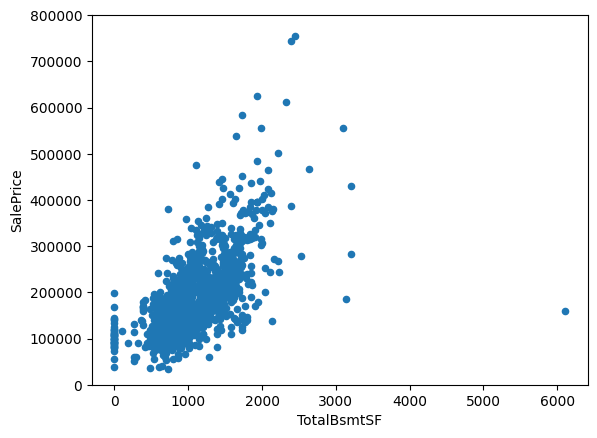

In [79]:
var = 'TotalBsmtSF'
data = train[['SalePrice',var]]
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

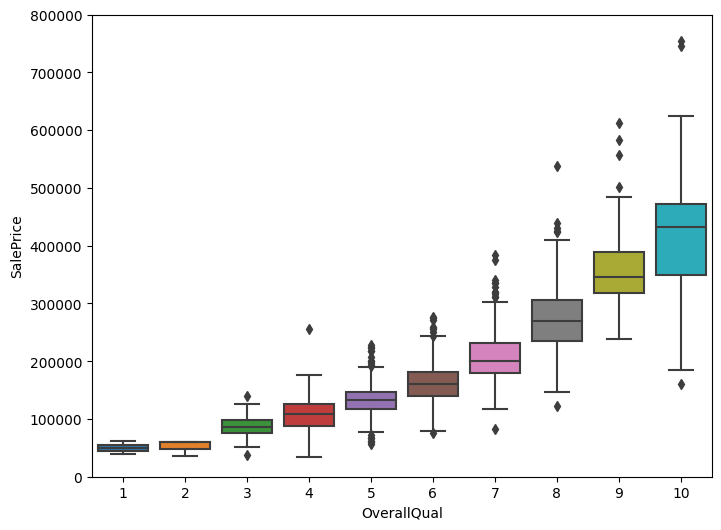

In [80]:
var = 'OverallQual'
data = train[['SalePrice',var]]
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

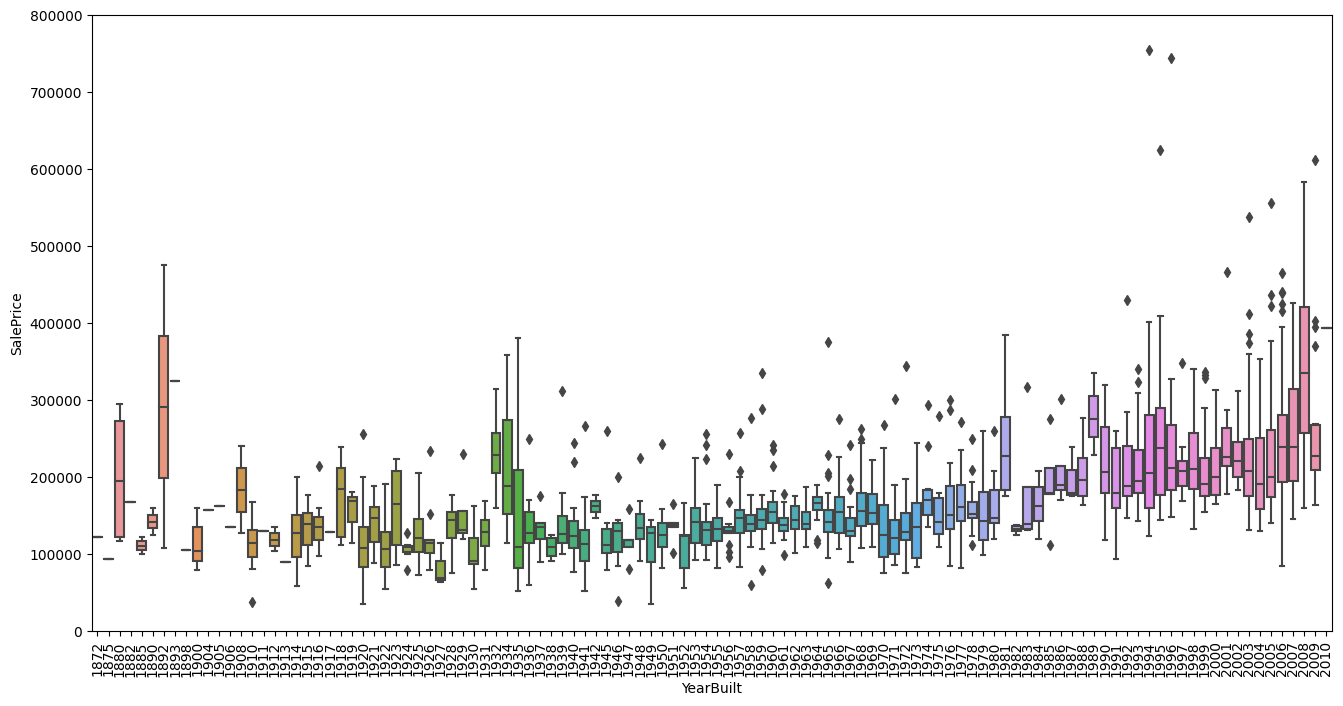

In [81]:
var = 'YearBuilt'
data = train[['SalePrice',var]]
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

1. 'GrLivArea' and 'TotalBsmtSF' seem to be linearly related with 'SalePrice'. Both relationships are positive, which means that as one variable increases, the other also increases. In the case of 'TotalBsmtSF', we can see that the slope of the linear relationship is particularly high.

2. 'OverallQual' and 'YearBuilt' also seem to be related with 'SalePrice'. The relationship seems to be stronger in the case of 'OverallQual', where the box plot shows how sales prices increase with the overall quality.

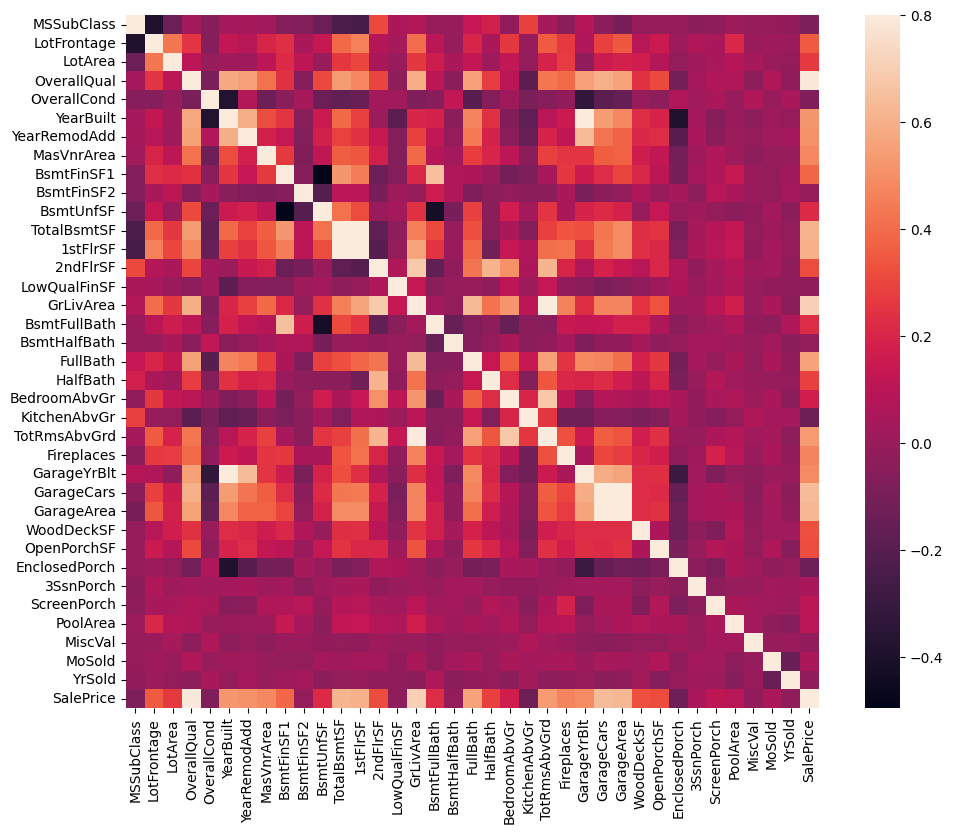

In [83]:
corrmat = numeric_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

1. At first sight, there are two red colored squares that get my attention. The first one refers to the 'TotalBsmtSF' and '1stFlrSF' variables, and the second one refers to the 'GarageX' variables. Both cases show how significant the correlation is between these variables. Actually, this correlation is so strong that it can indicate a situation of multicollinearity. If we think about these variables, we can conclude that they give almost the same information so multicollinearity really occurs. Heatmaps are great to detect this kind of situations and in problems dominated by feature selection, like ours, they are an essential tool.

2. Another thing that got my attention was the 'SalePrice' correlations. We can see our well-known 'GrLivArea', 'TotalBsmtSF', and 'OverallQual' saying a big 'Hi!', but we can also see many other variables that should be taken into account. That's what we will do next.

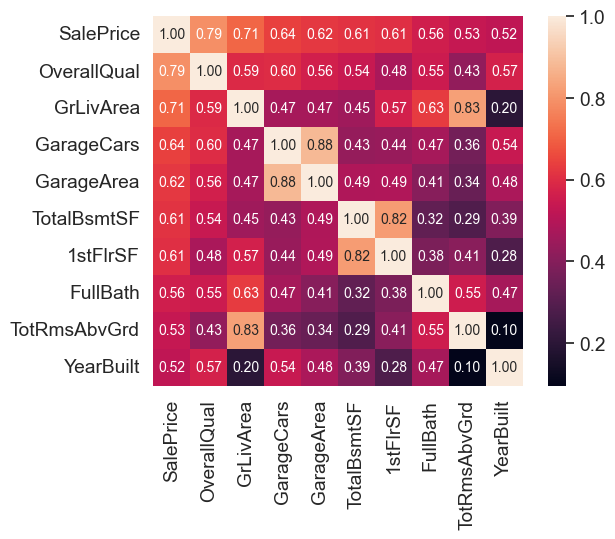

In [85]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

1. 'OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated with 'SalePrice'. Check!
2. 'GarageCars' and 'GarageArea' are also some of the most strongly correlated variables. However, as we discussed in the last sub-point, the number of cars that fit into the garage is a consequence of the garage area. 'GarageCars' and 'GarageArea' are like twin brothers. You'll never be able to distinguish them. Therefore, we just need one of these variables in our analysis (we can keep 'GarageCars' since its correlation with 'SalePrice' is higher).

3. 'TotalBsmtSF' and '1stFloor' also seem to be twin brothers. We can keep 'TotalBsmtSF' just to say that our first guess was right (re-read 'So... What can we expect?').

4. 'FullBath'?? Really?

5. 'TotRmsAbvGrd' and 'GrLivArea', twin brothers again. Is this dataset from Chernobyl?

6. Ah... 'YearBuilt'... It seems that 'YearBuilt' is slightly correlated with 'SalePrice'. Honestly, it scares me to think about 'YearBuilt' because I start feeling that we should do a little bit of time-series analysis to get this right. I'll leave this as a homework for you.

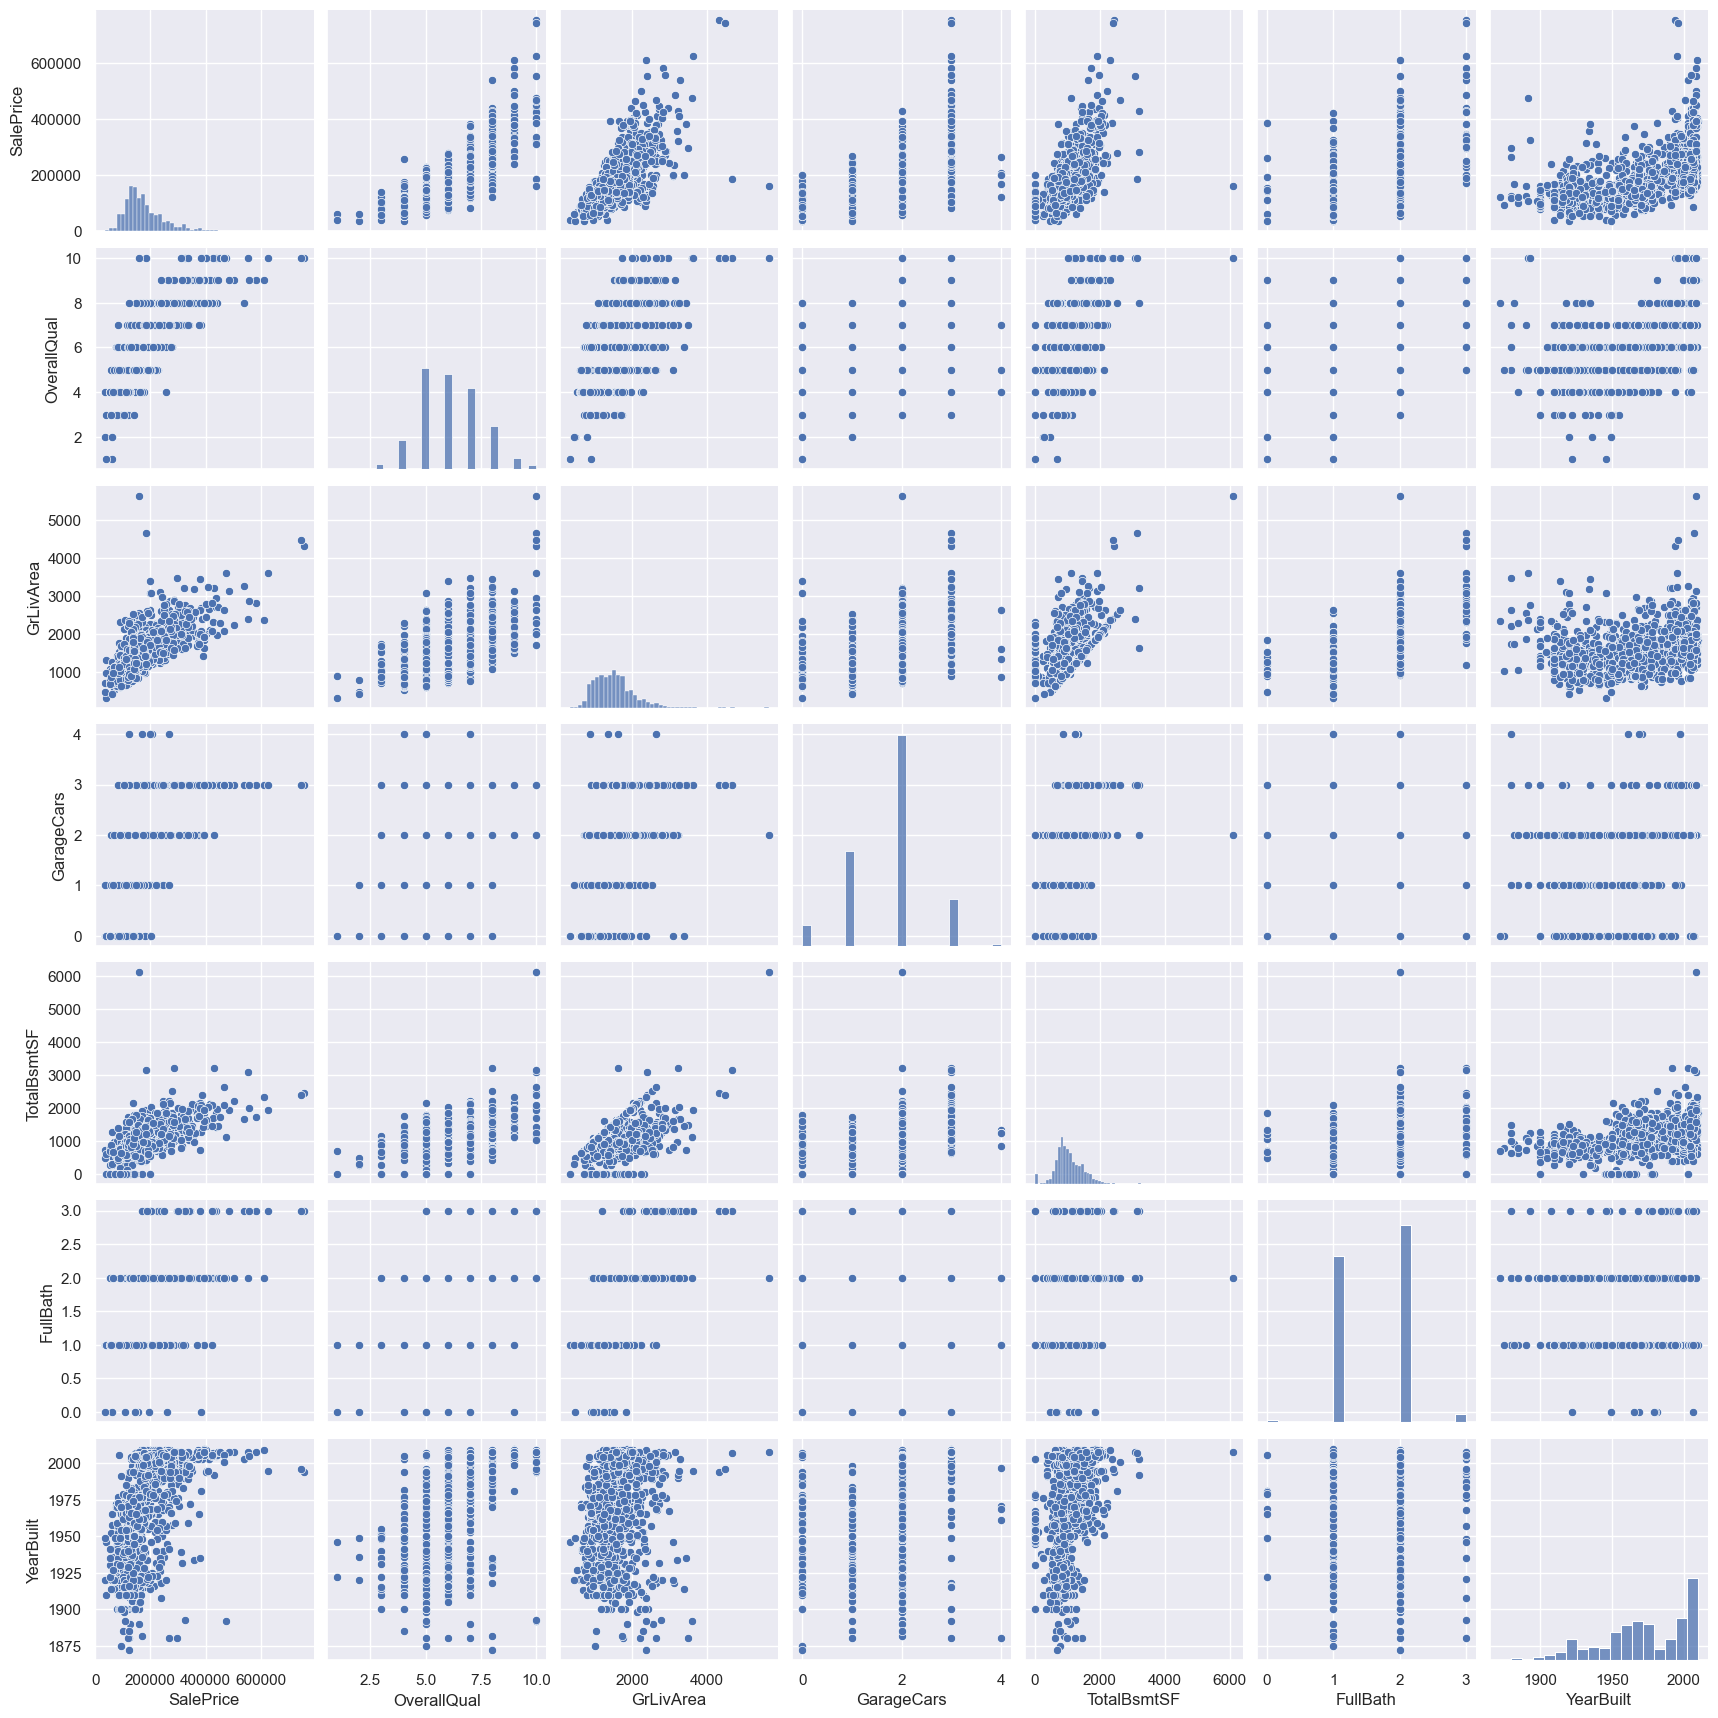

In [87]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], size = 2.5)
plt.show()

One of the figures we may find interesting is the one between 'TotalBsmtSF' and 'GrLiveArea'. In this figure we can see the dots drawing a linear line, which almost acts like a border. It totally makes sense that the majority of the dots stay below that line. Basement areas can be equal to the above ground living area, but it is not expected a basement area bigger than the above ground living area (unless you're trying to buy a bunker).

In [90]:
#missing data
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
MasVnrType,872,0.597260
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479


<Axes: >

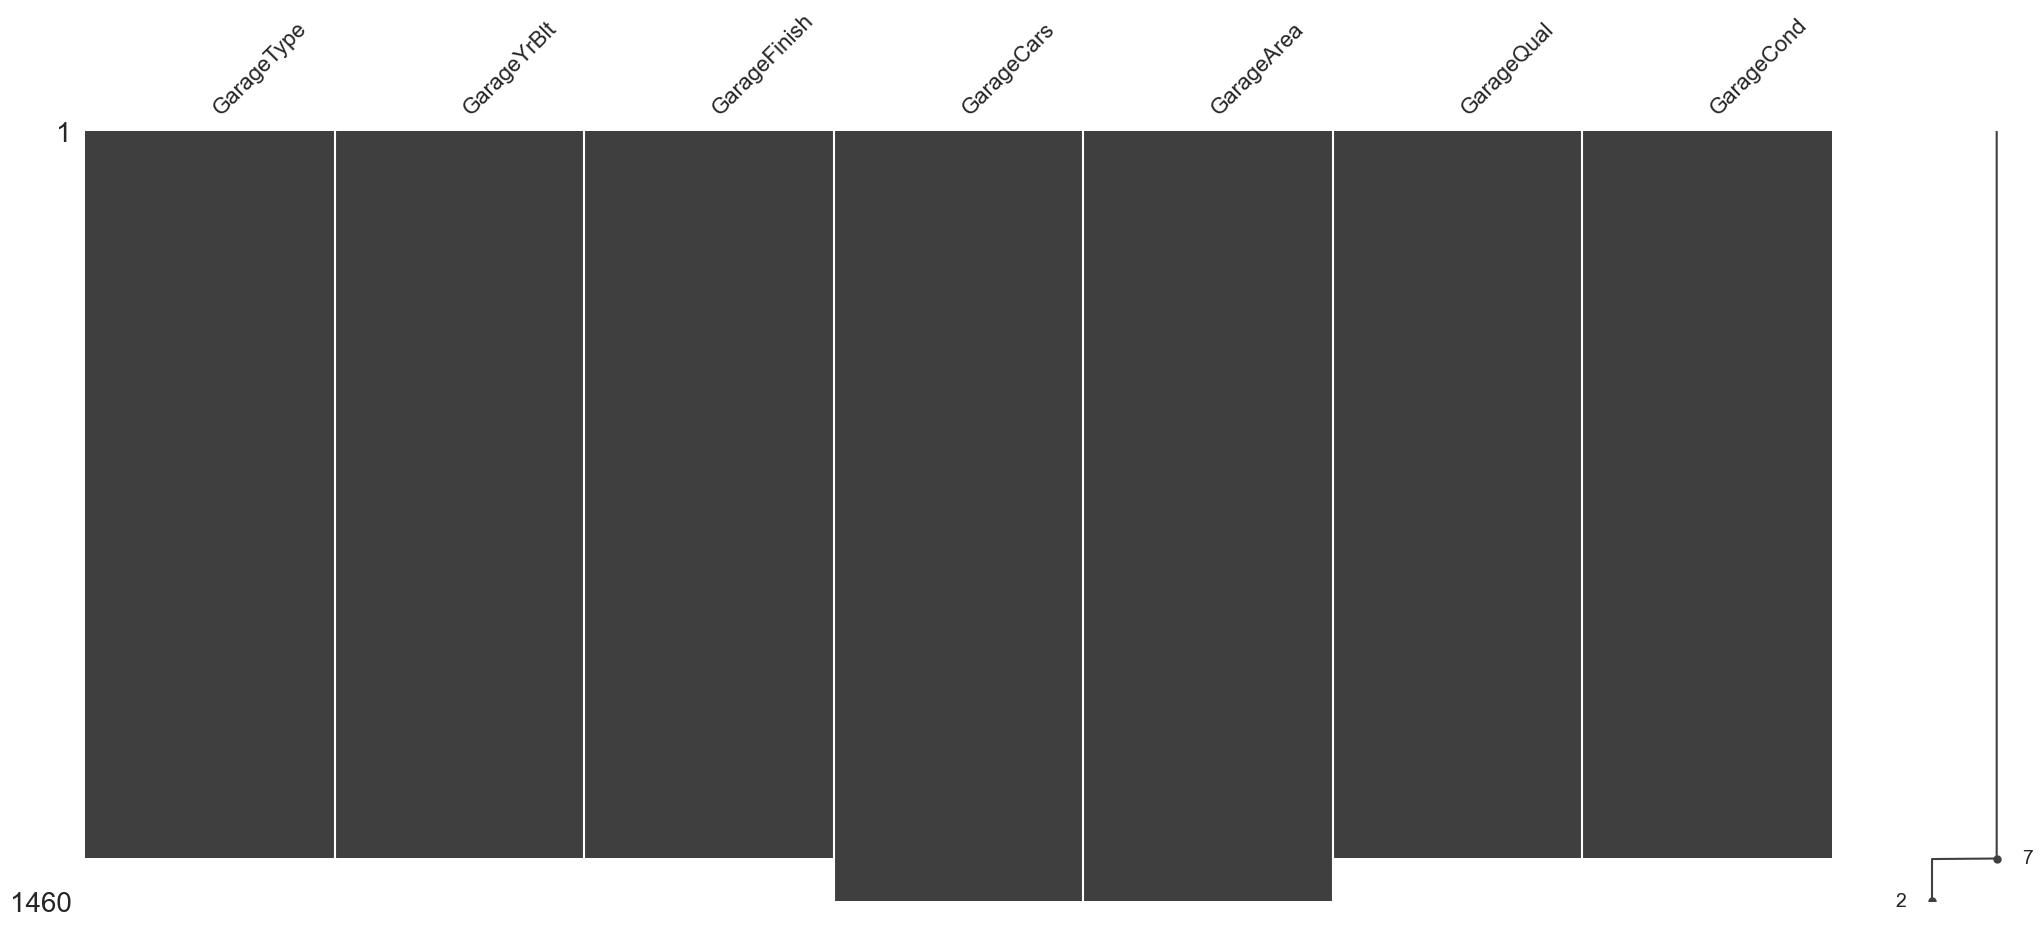

In [98]:
import missingno as msno
msno.matrix(train[[x for x in train.columns if 'Garage' in x]].sort_values('GarageYrBlt'))

In [359]:
train['GarageCars'][train['GarageType'].isna()]

39      0
48      0
78      0
88      0
89      0
       ..
1349    0
1407    0
1449    0
1450    0
1453    0
Name: GarageCars, Length: 81, dtype: int64

In [223]:
train['Fence'].unique()

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

<Axes: >

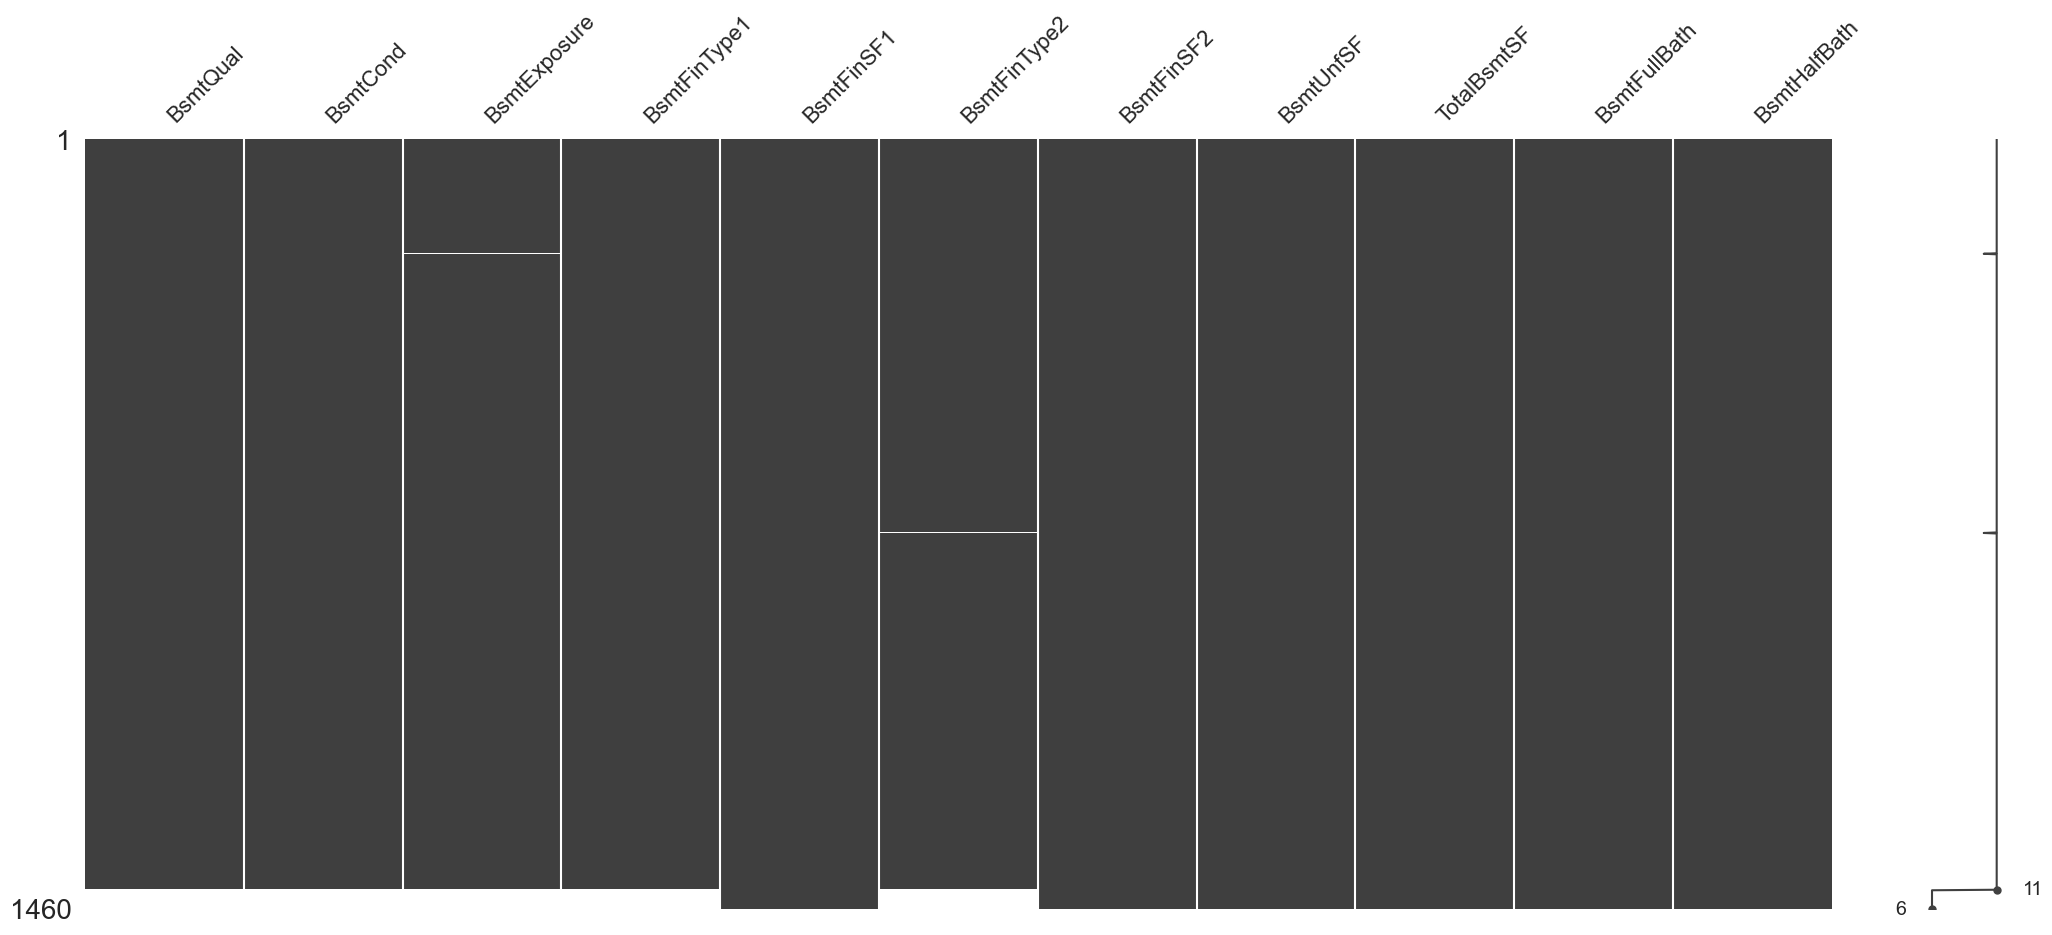

In [99]:
msno.matrix(train[[x for x in train.columns if 'Bsmt' in x]].sort_values('BsmtQual'))

In [102]:
df_train = train.drop((missing_data[missing_data['Total'] > 1]).index,axis=1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum().max()

0

In [103]:
df_train

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,112,0,0,0,0,4,2010,WD,Normal,142125


<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

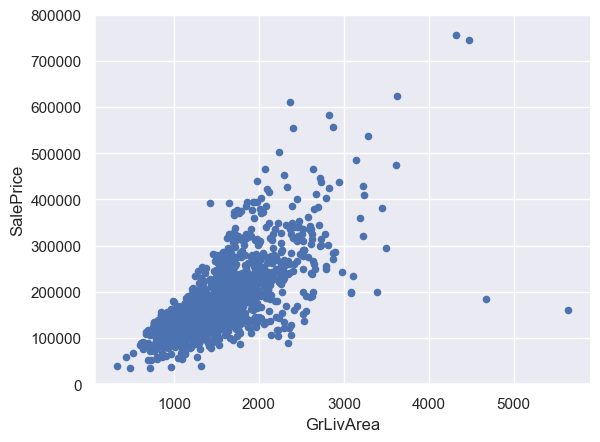

In [111]:
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = df_train[['SalePrice',var]]
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))


<Axes: xlabel='GrLivArea', ylabel='Density'>

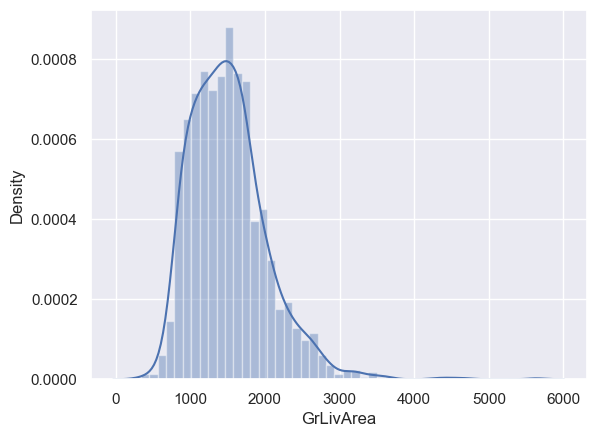

In [113]:
sns.distplot(df_train[var])

In [116]:
df_train[var].sort_values().iloc[-3:]

1182    4476
523     4676
1298    5642
Name: GrLivArea, dtype: int64

In [117]:
df_train = df_train[df_train[var]<4500]

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

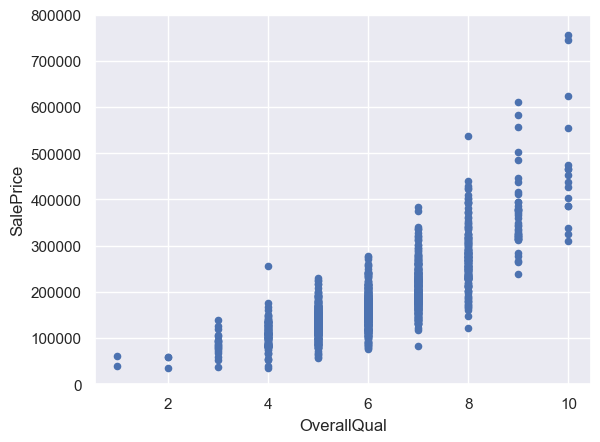

In [118]:
var = 'OverallQual'
data = df_train[['SalePrice',var]]
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))


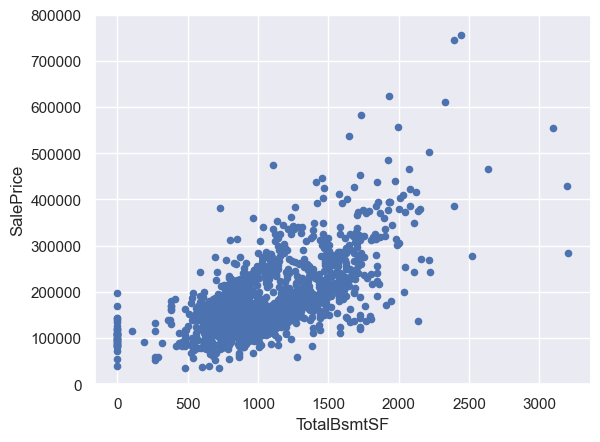

In [119]:
#bivariate analysis saleprice/grlivarea
var = 'TotalBsmtSF'
data = df_train[['SalePrice',var]]
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));


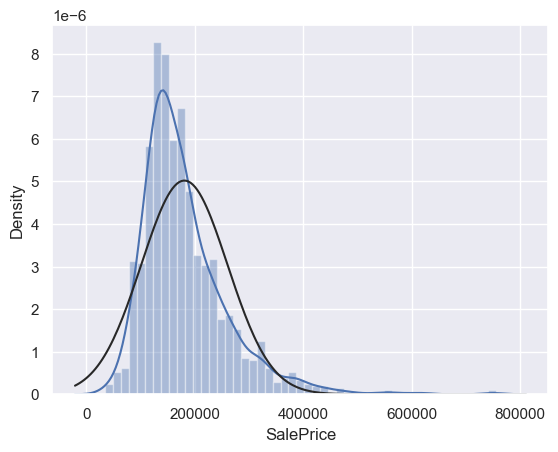

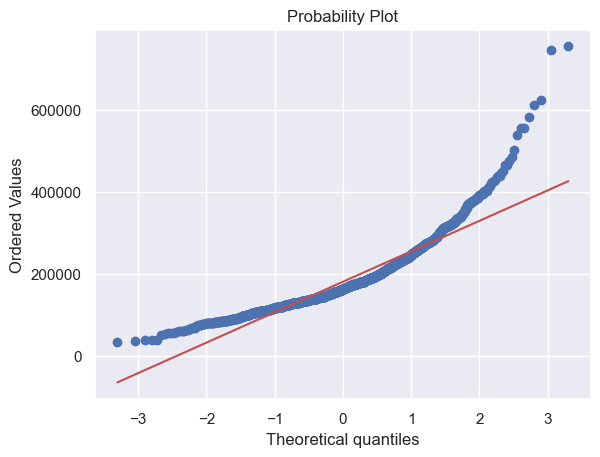

In [120]:
#histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

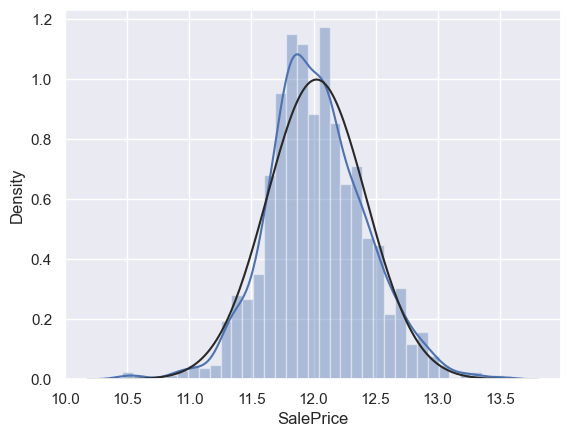

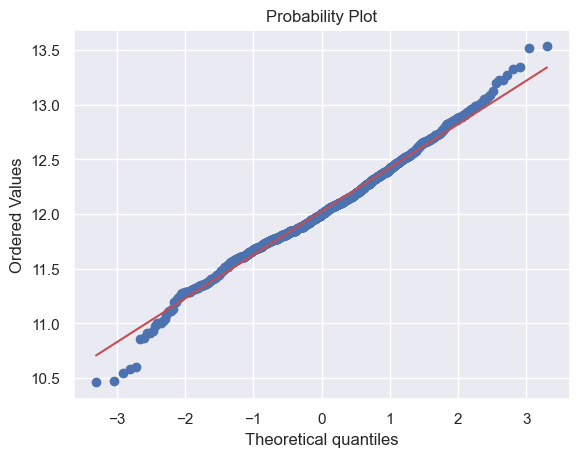

In [121]:
#applying log transformation
df_train['SalePrice'] = np.log(df_train['SalePrice'])

#transformed histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

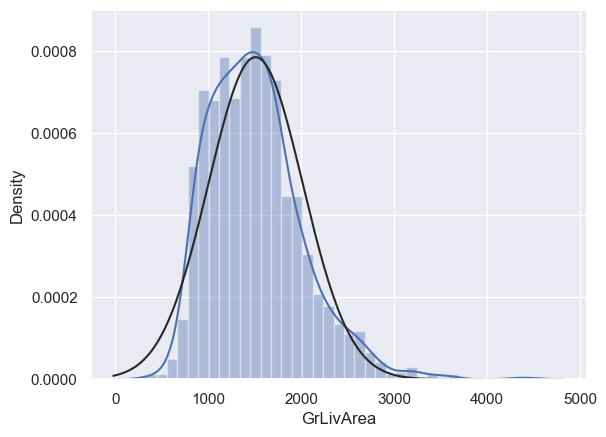

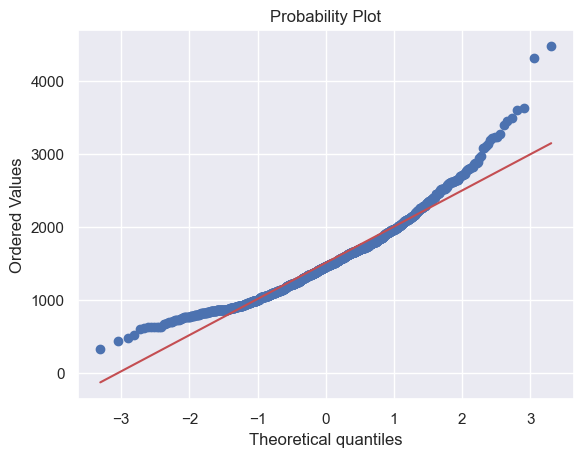

In [122]:
#histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)


In [123]:
#data transformation
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])

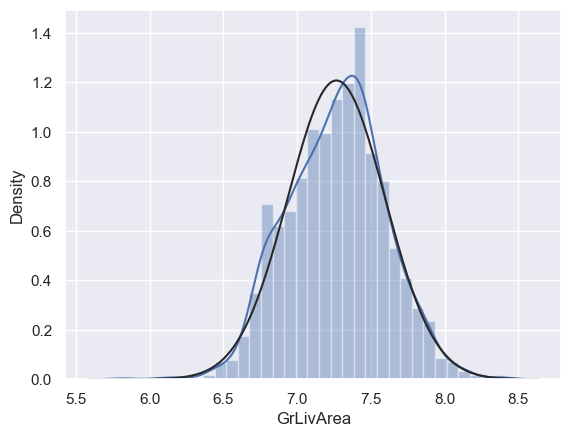

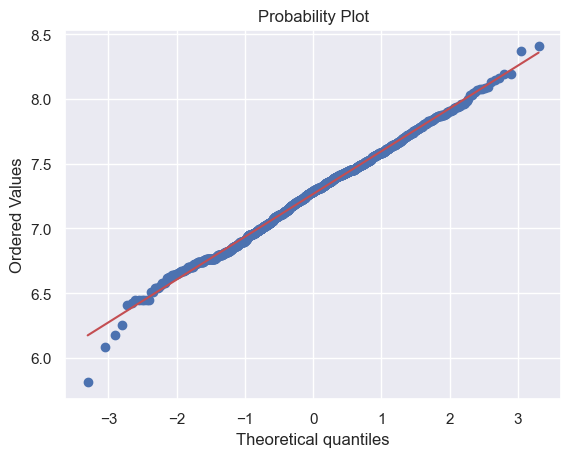

In [124]:
#transformed histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

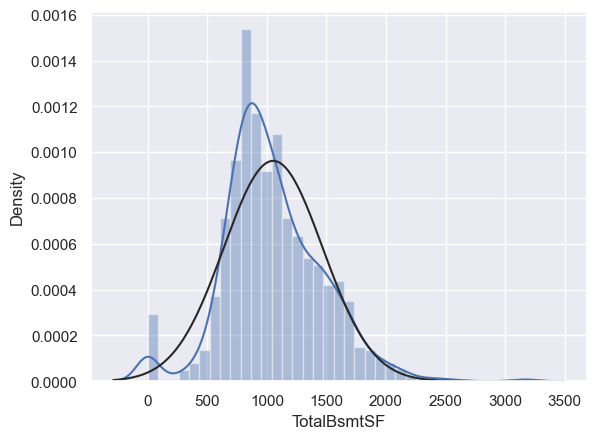

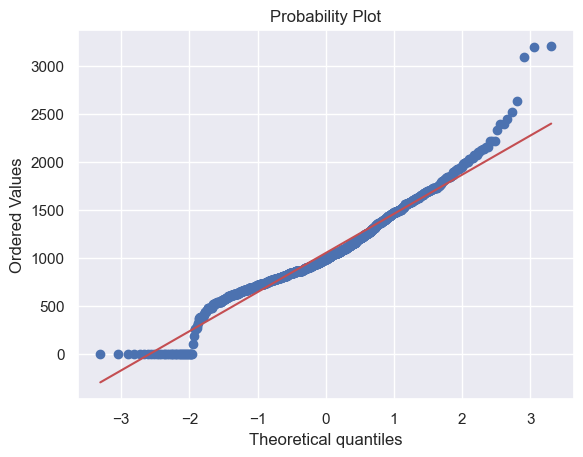

In [125]:
sns.distplot(df_train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)

In [127]:
sum(df_train['TotalBsmtSF'] == 0)

37

1. Something that, in general, presents skewness.
2. A significant number of observations with value zero (houses without basement).
3. A big problem because the value zero doesn't allow us to do log transformations.

In [128]:
df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index=df_train.index)
df_train['HasBsmt'] = 0 
df_train.loc[df_train['TotalBsmtSF']>0,'HasBsmt'] = 1

In [129]:
df_train.loc[df_train['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

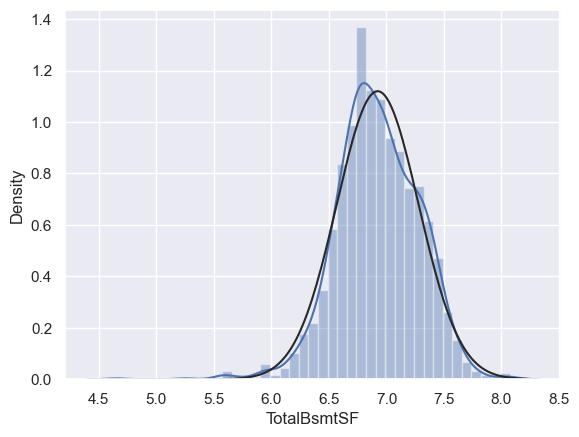

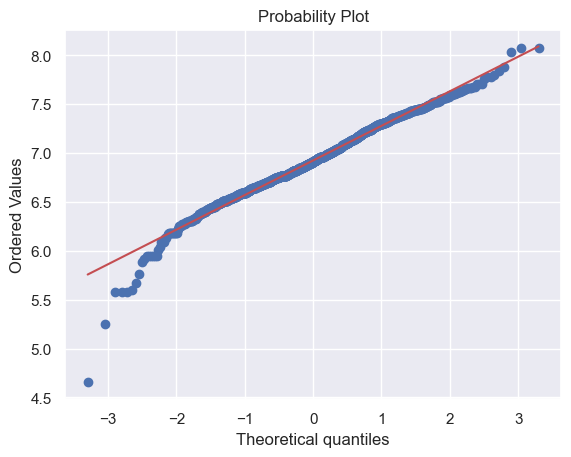

In [130]:
sns.distplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

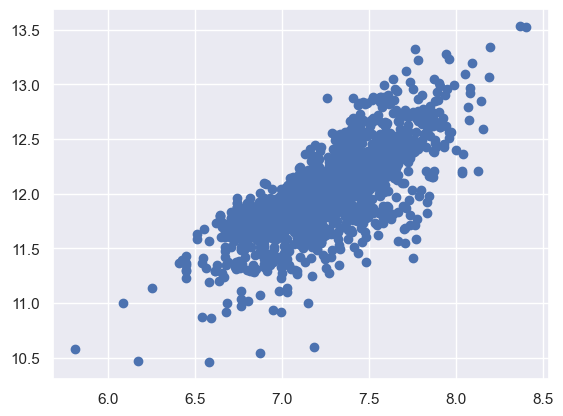

In [131]:
plt.scatter(df_train['GrLivArea'], df_train['SalePrice']);

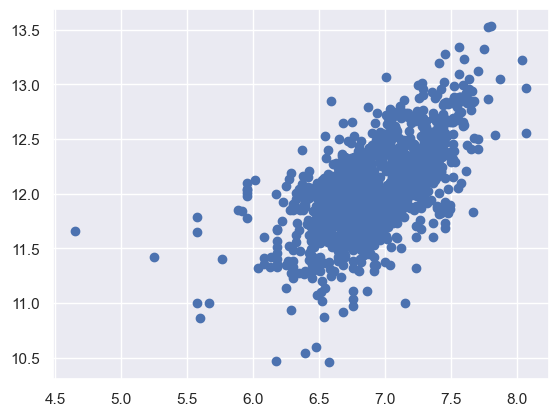

In [132]:
plt.scatter(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], df_train[df_train['TotalBsmtSF']>0]['SalePrice']);

In [136]:
df_train = pd.get_dummies(df_train)

In [146]:
y = df_train['SalePrice']
X = df_train.drop('SalePrice',axis=1)

In [204]:
X_train, X_val, y_train, y_val =  train_test_split(X,y,test_size=0.3)

In [206]:
Sacler = StandardScaler()
X_train = Sacler.fit_transform(X_train)
X_val = Sacler.transform(X_val)

Ridge Metrics: {'best_MSE': 0.013796708819622633, 'best_RMSE': 0.1174593922154488, 'best_MAE': 0.06827931991882193}


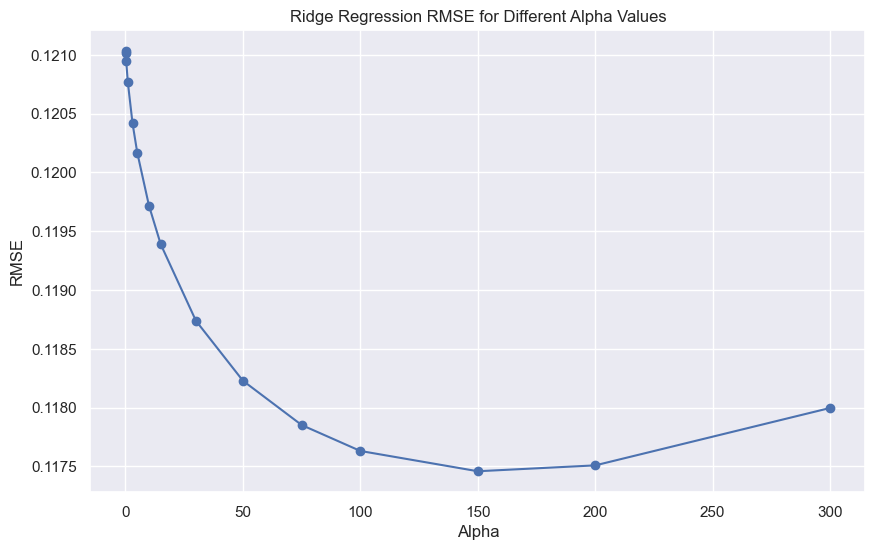

In [194]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error

def evaluate_model(model, params, X_train, y_train):
    """
    Evaluate a model using GridSearchCV on training data with cross-validation,
    and return the best estimator, performance metrics, and RMSE for each parameter.

    :param model: The regression model
    :param params: Parameter grid for GridSearchCV
    :param X_train: Training data features
    :param y_train: Training data labels
    :return: A tuple of best_estimator, best_params, metrics, and RMSE scores for each parameter
    """
    pipeline = make_pipeline(StandardScaler(), model)
    grid_search = GridSearchCV(pipeline, params, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)

    best_estimator = grid_search.best_estimator_
    best_params = grid_search.best_params_
    cv_results = grid_search.cv_results_

    # Calculate RMSE for each parameter
    rmse_scores = np.sqrt(-cv_results['mean_test_score'])

    # Extract performance metrics for the best estimator
    best_mse = -cv_results['mean_test_score'][grid_search.best_index_]
    best_rmse = np.sqrt(best_mse)
    best_mae = mean_absolute_error(y_train, best_estimator.predict(X_train))
    best_r2 = r2_score(y_train, y_pred)

    metrics = {
        'best_MSE': best_mse,
        'best_RMSE': best_rmse,
        'best_MAE': best_mae
    }

    return best_estimator, best_params, metrics, rmse_scores

# Example usage
# Define parameter grids for each model
ridge_params = {'ridge__alpha': [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75,100,150,200,300]}

# Evaluate Ridge model
best_ridge, best_ridge_params, ridge_metrics, ridge_rmse_scores = evaluate_model(Ridge(), ridge_params, X, y)

# Print results
print("Ridge Metrics:", ridge_metrics)

# Plotting RMSE for each alpha value in Ridge
plt.figure(figsize=(10, 6))
plt.plot(pd.Series(ridge_rmse_scores,index =ridge_params['ridge__alpha']) , marker='o')
plt.xlabel('Alpha')
plt.ylabel('RMSE')
plt.title('Ridge Regression RMSE for Different Alpha Values')
plt.show()


Lasso Metrics: {'best_MSE': 0.013383673613663664, 'best_RMSE': 0.11568782828657327, 'best_MAE': 0.06759249321914312}


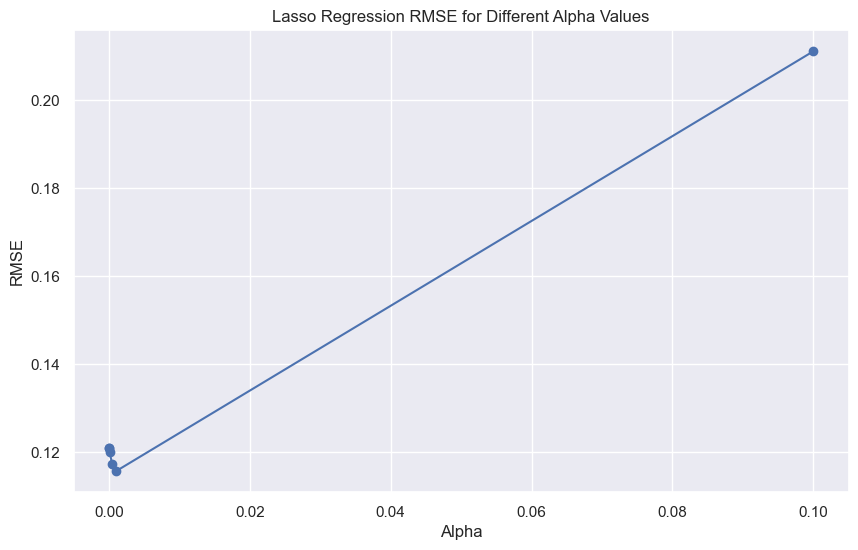

In [177]:
# Example usage
# Define parameter grids for each model
lasso_params = {'lasso__alpha': [ 0.1, 0.001, 0.0005, 1e-4, 1e-5, 1e-6]}

# Evaluate Ridge model
best_lasso, best_lasso_params, lasso_metrics, lasso_rmse_scores = evaluate_model(Lasso(), lasso_params, X, y)

# Print results
print("Lasso Metrics:", lasso_metrics)

# Plotting RMSE for each alpha value in Ridge
plt.figure(figsize=(10, 6))
plt.plot(pd.Series(lasso_rmse_scores,index =lasso_params['lasso__alpha']) , marker='o')
plt.xlabel('Alpha')
plt.ylabel('RMSE')
plt.title('Lasso Regression RMSE for Different Alpha Values')
plt.show()



In [182]:
coef = pd.Series(best_lasso[1].coef_, index = X.columns)

In [183]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 159 variables and eliminated the other 61 variables


In [184]:
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

Text(0.5, 1.0, 'Coefficients in the Lasso Model')

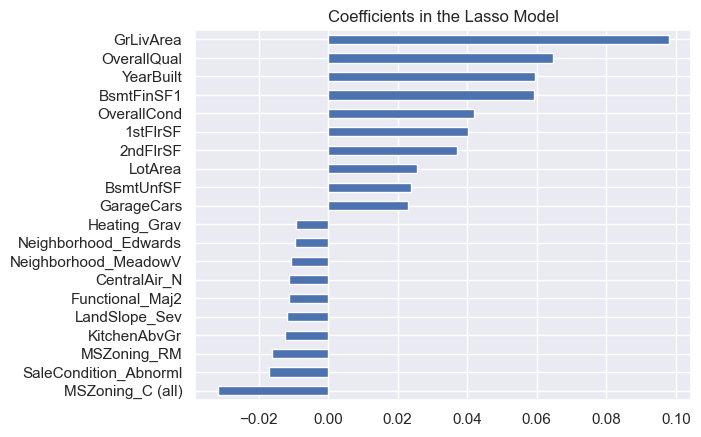

In [185]:
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

<Axes: xlabel='preds', ylabel='residuals'>

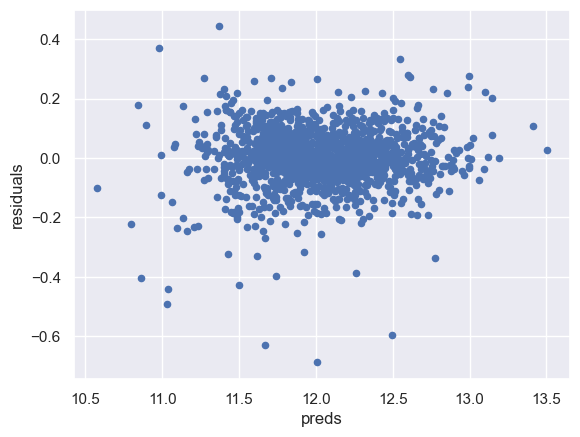

In [191]:
preds = pd.DataFrame({"preds":best_lasso[1].predict(StandardScaler().fit_transform(X)), "true":y})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")

In [199]:
def evaluate_model(model, params, X_train, y_train):
    pipeline = make_pipeline(StandardScaler(), model)
    grid_search = GridSearchCV(pipeline, params, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)

    best_estimator = grid_search.best_estimator_
    best_params = grid_search.best_params_
    cv_results = grid_search.cv_results_

    # Calculate RMSE for each parameter
    rmse_scores = np.sqrt(-cv_results['mean_test_score'])

    # Calculate average MSE, RMSE, MAE, R2 and Adjusted R2 across folds
    scores = cross_val_score(best_estimator, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    avg_mse = -np.mean(scores)
    avg_rmse = np.sqrt(avg_mse)
    avg_mae = -np.mean(cross_val_score(best_estimator, X_train, y_train, cv=5, scoring='neg_mean_absolute_error'))
    avg_r2 = np.mean(cross_val_score(best_estimator, X_train, y_train, cv=5, scoring='r2'))

    # Calculate Adjusted R²
    n = X_train.shape[0]  # Number of observations
    p = X_train.shape[1]  # Number of features
    avg_adj_r2 = 1 - (1 - avg_r2) * (n - 1) / (n - p - 1)

    metrics = {
        'avg_MSE': avg_mse,
        'avg_RMSE': avg_rmse,
        'avg_MAE': avg_mae,
        'avg_R2': avg_r2,
        'avg_Adjusted_R2': avg_adj_r2
    }

    return best_estimator, best_params, metrics, rmse_scores


In [203]:
import pandas as pd

# Define parameter grids for each model
ridge_params = {'ridge__alpha': [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]}
lasso_params = {'lasso__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
elasticnet_params = {'elasticnet__alpha': [0.001, 0.01, 0.1, 1, 10, 100], 
                     'elasticnet__l1_ratio': [0.1, 0.2, 0.5, 0.8]}

# Evaluate models
models_metrics = []
for name, model, params in [('Ridge', Ridge(), ridge_params), 
                            ('Lasso', Lasso(), lasso_params), 
                            ('ElasticNet', ElasticNet(), elasticnet_params)]:
    best_estimator, best_params, metrics, _ = evaluate_model(model, params, X, y)
    metrics['Model'] = name
    metrics['params'] = best_params
    metrics['estimator'] = best_estimator[1]
    models_metrics.append(metrics)

# Create a DataFrame for comparison
results_df = pd.DataFrame(models_metrics)
results_df.set_index('Model', inplace=True)

print(results_df)

             avg_MSE  avg_RMSE   avg_MAE    avg_R2  avg_Adjusted_R2   
Model                                                                 
Ridge       0.013889  0.117852  0.081303  0.913161         0.897704  \
Lasso       0.013384  0.115688  0.079732  0.916249         0.901342   
ElasticNet  0.012859  0.113397  0.078533  0.919393         0.905046   

                                                       params   
Model                                                           
Ridge                                    {'ridge__alpha': 75}  \
Lasso                                 {'lasso__alpha': 0.001}   
ElasticNet  {'elasticnet__alpha': 0.01, 'elasticnet__l1_ra...   

                                       estimator  
Model                                             
Ridge                            Ridge(alpha=75)  
Lasso                         Lasso(alpha=0.001)  
ElasticNet  ElasticNet(alpha=0.01, l1_ratio=0.2)  


In [209]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [210]:
import xgboost as xgb


dtrain = xgb.DMatrix(X, label = y)

params = {"max_depth":2, "eta":0.1}
model = xgb.cv(params, dtrain,  num_boost_round=500, early_stopping_rounds=100)

<Axes: >

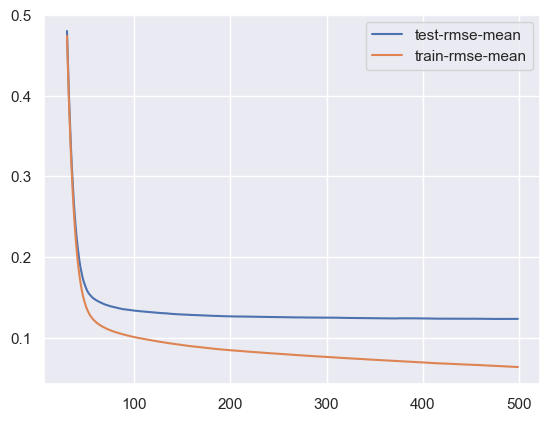

In [213]:
model.loc[30:,["test-rmse-mean", "train-rmse-mean"]].plot()

In [220]:
import itertools
import xgboost as xgb

def run_xgb_cv(params, dtrain, cv_params, num_boost_rounds, early_stopping_rounds=100):
    """
    Run cross-validation for XGBoost with a given set of parameters and parameter grid.
    
    :param params: Base parameters for XGBoost.
    :param dtrain: DMatrix for training data.
    :param cv_params: Parameter grid for cross-validation, excluding num_boost_round.
    :param num_boost_rounds: List of values for num_boost_round to try.
    :param early_stopping_rounds: Early stopping rounds.
    :return: Best parameters, including best num_boost_round, and the corresponding RMSE.
    """
    best_rmse = float("Inf")
    best_params = None
    best_num_boost_round = None

    for n_boost_round in num_boost_rounds:
        for param_values in itertools.product(*cv_params.values()):
            cv_param = dict(zip(cv_params.keys(), param_values))
            updated_params = {**params, **cv_param}

            cv_results = xgb.cv(updated_params, dtrain, num_boost_round=n_boost_round,
                                nfold=5, metrics={'rmse'}, seed=42, early_stopping_rounds=early_stopping_rounds)
            
            mean_rmse = cv_results['test-rmse-mean'].mean()
            if mean_rmse < best_rmse:
                best_rmse = mean_rmse
                best_params = cv_param
                best_num_boost_round = n_boost_round

    return best_params, best_num_boost_round, best_rmse

# Example usage
params = {"objective": "reg:squarederror"}
cv_params = {
    'max_depth': [1, 2, 3, 4, 5],
    'eta': [0.01, 0.1, 0.2,0.5]}
num_boost_rounds = [100, 200, 250, 300,400, 500]

dtrain = xgb.DMatrix(X, label=y)
best_params, best_num_boost_round, best_rmse = run_xgb_cv(params, dtrain, cv_params, num_boost_rounds)
print(f"Best parameters: {best_params}, Best num_boost_round: {best_num_boost_round}, RMSE: {best_rmse}")


Best parameters: {'max_depth': 1, 'eta': 0.5}, Best num_boost_round: 500, RMSE: 0.14922072671359615


In [430]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split

from sklearn.kernel_ridge import KernelRidge

from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor

import xgboost as xgb
import lightgbm as lgb

n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, X.values, y.values, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))



Lasso score: 0.1116 (0.0066)

ElasticNet score: 0.1116 (0.0067)

Kernel Ridge score: 0.7349 (0.4333)

Gradient Boosting score: 0.1173 (0.0091)

[14:55:38] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[14:55:39] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[14:55:41] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[14:55:44] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[14:55:45] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 


In [432]:
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone


class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

In [433]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


 Averaged base models score: 0.2161 (0.0941)



In [434]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
    
      #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [435]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))


Stacking Averaged models score: 0.1076 (0.0076)


In [437]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

## StackedRegressor:

stacked_averaged_models.fit(X.values, y)
stacked_train_pred = stacked_averaged_models.predict(X.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))
print(rmsle(y_train, stacked_train_pred))

## XGBoost:

model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(y_train, xgb_train_pred))

## LightGBM:
model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test.values))
print(rmsle(y_train, lgb_train_pred))

print('RMSLE score on train data:')
print(rmsle(y_train,stacked_train_pred*0.70 +
               xgb_train_pred*0.15 + lgb_train_pred*0.15 ))

KeyError: '[523, 1298, 1379] not in index'

In [455]:
from bayes_opt import BayesianOptimization
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np

# Define the objective function
def xgb_evaluate(max_depth, gamma, colsample_bytree, n_estimators):
    params = {'max_depth': int(max_depth),
              'gamma': gamma,
              'colsample_bytree': colsample_bytree,
              'n_estimators': int(n_estimators),
              'objective': 'reg:squarederror'}
    cv_result = cross_val_score(xgb.XGBRegressor(**params), X, y, scoring='neg_mean_squared_error', cv=5)
    return np.mean(cv_result)

# Set up the parameter space
param_bounds = {'max_depth': (3, 10),
                'gamma': (0, 5),
                'colsample_bytree': (0.3, 0.9),
                'n_estimators': (50, 300)}  # Example range

# Continue with the Bayesian Optimization process as before...
# Initialize optimizer
optimizer = BayesianOptimization(f=xgb_evaluate, pbounds=param_bounds, random_state=1)

# Run optimization
optimizer.maximize(init_points=10, n_iter=25)

# Extract the best parameters
best_params = optimizer.max['params']
best_params['max_depth'] = int(best_params['max_depth'])
best_params['n_estimators'] = int(best_params['n_estimators'])

# Train the final model
final_model = xgb.XGBRegressor(**best_params)
final_model.fit(X, y)

|   iter    |  target   | colsam... |   gamma   | max_depth | n_esti... |
-------------------------------------------------------------------------
| 1         | -0.0344   | 0.5502    | 3.602     | 3.001     | 125.6     |
| 2         | -0.02209  | 0.3881    | 0.4617    | 4.304     | 136.4     |
| 3         | -0.031    | 0.5381    | 2.694     | 5.934     | 221.3     |
| 4         | -0.03792  | 0.4227    | 4.391     | 3.192     | 217.6     |
| 5         | -0.03125  | 0.5504    | 2.793     | 3.983     | 99.53     |
| 6         | -0.03711  | 0.7804    | 4.841     | 5.194     | 223.1     |
| 7         | -0.03629  | 0.8258    | 4.473     | 3.595     | 59.76     |
| 8         | -0.03748  | 0.4019    | 4.391     | 3.688     | 155.3     |
| 9         | -0.0313   | 0.8747    | 2.666     | 7.843     | 128.9     |
| 10        | -0.03571  | 0.7119    | 4.173     | 3.128     | 237.5     |
| 11        | -0.03127  | 0.4983    | 2.822     | 3.939     | 99.29     |
| 12        | -0.02604  | 0.7958    | 

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.0, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=269, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [456]:
best_params

{'colsample_bytree': 0.9, 'gamma': 0.0, 'max_depth': 3, 'n_estimators': 269}

In [458]:
np.mean(cross_val_score(xgb.XGBRegressor(**best_params), X, y, scoring='neg_mean_squared_error', cv=5))

-0.01570374514132214

In [459]:
np.sqrt(0.01570374514132214)

0.12531458471112666